In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df=pd.read_csv("Final_Dataset_Genes.csv")
df.head(1)

,Unnamed: 0,LINC01972,GSTM2,DPEP2,VPS29,MIR3654,SORD,RRBP1,SLC25A43,MIR3615,...,ADORA2A,IL36RN,TPD52,NECTIN4.AS1,KLC1,ZNF784,BRF1,TAF1,MIR8078,Label
0,0,0.0,1.360425,0.331361,6.444548,0.0,4.137351,7.007994,5.804019,0.0,...,0.305312,0.345053,5.913141,0.563678,2.803097,5.238381,4.577846,5.437249,0.706995,1


In [3]:
df.drop("Unnamed: 0",axis=1,inplace=True)

total genes 26618+ 1 label column and no. of samples are 328

# Feature Selection and Dimensionality Reduction Techniques

1 . PCA

In [16]:
!pip install plotly

In [2]:
#importing necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [8]:
# Separate label and feature columns
y = df['Label']
X = df.drop(columns=['Label'])

In [19]:
#applying the pca
std_scaler=StandardScaler()
X_scaled=std_scaler.fit_transform(X)
# Keeping all components initially
pca = PCA()
pca_components = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_ #explained variance ratio
cumulative_variance = np.cumsum(explained_variance)  #cummulative explained variance

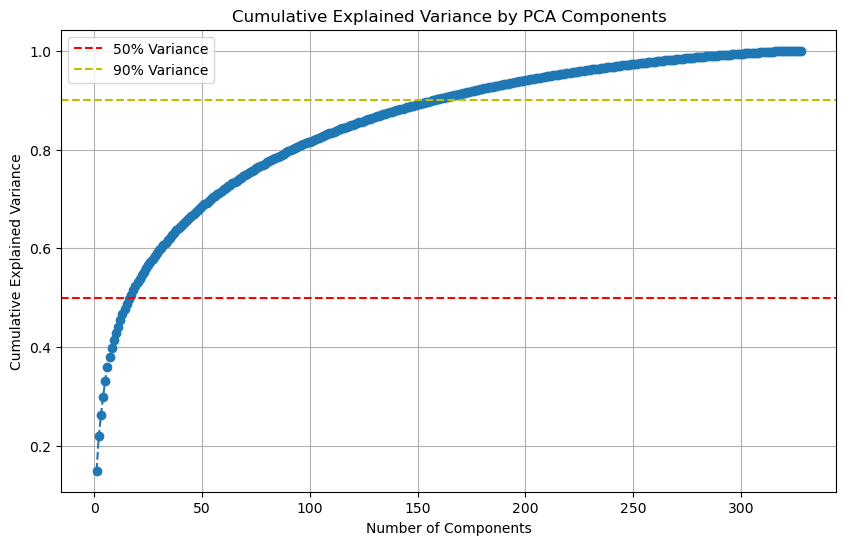

In [20]:
#scree plot for the explained variance ratio and cummulative explained varinace ratio 

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.50, color='r', linestyle='--', label='50% Variance')
plt.axhline(y=0.90, color='y', linestyle='--', label='90% Variance')
plt.legend()
plt.show()

#plot indicates that the 90 percent variance is captured by the 200 components

In [21]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=list(range(1, len(explained_variance)+1)),
    y=cumulative_variance,
    mode='lines+markers',
    name='Cumulative Explained Variance'
))
fig.add_hline(y=0.9, line_dash="dash", line_color="red", annotation_text="90% Cutoff")
fig.add_trace(go.Scatter(
    x=list(range(1, len(explained_variance)+1)),
    y=explained_variance,
    mode='lines+markers',
    name='Individual Explained Variance'
))
fig.update_layout(
    title="PCA Explained Variance (Interactive Scree Plot)",
    xaxis_title="Principal Component",
    yaxis_title="Explained Variance",
    template="plotly_white"
)
fig.show()

In [23]:
# for visualizing the 2d pca 

pca_2d = PCA(n_components=2)
reduced_2d = pca_2d.fit_transform(X_scaled)

import plotly.express as px
df_2d = pd.DataFrame(reduced_2d, columns=['PC1', 'PC2'])
df_2d['label'] = y.values

fig = px.scatter(df_2d, x='PC1', y='PC2', color='label',
                 title='PCA 2D Projection',
                 labels={'label': 'Group'})
fig.show()

In [24]:
# 3d pca plot 
pca_3d = PCA(n_components=3)
reduced_3d = pca_3d.fit_transform(X_scaled)

df_3d = pd.DataFrame(reduced_3d, columns=['PC1', 'PC2', 'PC3'])
df_3d['label'] = y.values

fig = px.scatter_3d(df_3d, x='PC1', y='PC2', z='PC3', color='label',
                    title='PCA 3D Projection')
fig.show()

Choosing the top 200 components as it captures the ~90 percent variance 

In [22]:
# choosing the top 200 components which comprises of ~90 percent variance

pca_optimal = PCA(n_components=200)  # or 200
X_reduced = pca_optimal.fit_transform(scaled_features)



In [24]:
from sklearn.model_selection import train_test_split

In [48]:
l1=df.columns.to_list()

In [49]:
l1.remove('Label')

In [72]:
loadings = pd.DataFrame(pca_optimal.components_.T, columns=[f'PC{i+1}' for i in range(200)],index=l1)
loadings['Abs_PC1'] = loadings['PC1'].abs()  # Absolute values for PC1
top_genes = loadings.sort_values('Abs_PC1', ascending=False).head(20)

In [73]:
loadings["Abs_PC2"]=loadings["PC2"].abs()
top_genes_2=loadings.sort_values('Abs_PC2', ascending=False).head(20)

In [80]:
top_genes.head(1)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC192,PC193,PC194,PC195,PC196,PC197,PC198,PC199,PC200,Abs_PC1
FBXO21,-0.015354,-0.001202,-0.001135,0.000717,-0.00046,0.000411,0.003116,-0.002638,0.00295,-0.002826,...,-0.003013,0.005883,0.000791,-0.002015,-0.003549,0.009909,0.003721,0.000958,-0.000355,0.015354


In [ ]:
top_genes["Abs_PC1"]

In [ ]:
top_genes_2["Abs_PC2"]

In [122]:
# without select kbest
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc
from sklearn.metrics import accuracy_score, classification_report, f1_score
from xgboost import XGBClassifier

# Train/Val/Test split
X_train_full, X_temp, y_train_full, y_temp = train_test_split(features, labels, test_size=0.4, stratify=labels, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Model configs
models = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'param_grid': {
            'clf__n_estimators': [100],
            'clf__max_depth': [None, 10],
            'clf__class_weight': ['balanced', {0: 16.26, 1: 1}]
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000, random_state=42),
        'param_grid': {
            'clf__C': [0.01, 0.1],
            'clf__penalty': ['l1', 'l2'],
            'clf__solver': ['liblinear'],
            'clf__class_weight': ['balanced', {0: 16.26, 1: 1}]
        }
    },
    'SVM': {
        'model': SVC(kernel='rbf', probability=True, random_state=42),
        'param_grid': {
            'clf__C': [0.1, 1],
            'clf__class_weight': ['balanced', {0: 16.26, 1: 1}]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        'param_grid': {
            'clf__n_estimators': [100],
            'clf__max_depth': [3, 5],
            'clf__scale_pos_weight': [16.26, 10]
        }
    }
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = {}

for model_name, config in models.items():
    print(f"\nTraining {model_name}...")

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=50)),
        ('clf', config['model'])
    ])

    grid = GridSearchCV(pipeline, config['param_grid'], cv=cv, scoring='f1', n_jobs=-1)
    grid.fit(X_train_full, y_train_full)

    best_model = grid.best_estimator_
    results[model_name] = {
        'best_model': best_model,
        'best_params': grid.best_params_,
        'best_score': grid.best_score_
    }

    # Evaluate on all sets
    sets = {'Train': (X_train_full, y_train_full), 'Val': (X_val, y_val), 'Test': (X_test, y_test)}
    for set_name, (X_set, y_set) in sets.items():
        pred = best_model.predict(X_set)
        acc = accuracy_score(y_set, pred)
        f1 = f1_score(y_set, pred)
        results[model_name][f'{set_name}_acc'] = acc
        results[model_name][f'{set_name}_f1'] = f1

    # Metrics on test set
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, 'predict_proba') else best_model.decision_function(X_test)

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.savefig(f'conf_{model_name}.png')
    plt.close()

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'AUC={auc(fpr, tpr):.2f}')
    plt.plot([0,1],[0,1],'k--')
    plt.legend()
    plt.title(f'ROC - {model_name}')
    plt.savefig(f'roc_{model_name}.png')
    plt.close()

    prec, rec, _ = precision_recall_curve(y_test, y_proba)
    plt.plot(rec, prec, label=f'PR-AUC={auc(rec, prec):.2f}')
    plt.legend()
    plt.title(f'PR - {model_name}')
    plt.savefig(f'pr_{model_name}.png')
    plt.close()

# Overfitting plot
sets = ['Train', 'Val', 'Test']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for idx, model_name in enumerate(models):
    accs = [results[model_name][f'{s}_acc'] for s in sets]
    f1s = [results[model_name][f'{s}_f1'] for s in sets]

    axes[idx].plot(sets, accs, label='Accuracy', marker='o')
    axes[idx].plot(sets, f1s, label='F1 Score', marker='s')
    axes[idx].set_title(model_name)
    axes[idx].set_ylim(0, 1.1)
    axes[idx].legend()

plt.tight_layout()
plt.savefig('overfitting_check_pipeline.png')
plt.close()

# Summary
summary = pd.DataFrame({
    'Model': list(models.keys()),
    'Best CV F1': [results[k]['best_score'] for k in models],
    'Train Acc': [results[k]['Train_acc'] for k in models],
    'Val Acc': [results[k]['Val_acc'] for k in models],
    'Test Acc': [results[k]['Test_acc'] for k in models],
    'Test F1': [results[k]['Test_f1'] for k in models]
})
print(summary)
summary.to_csv('summary_pipeline_results.csv', index=False)



Training RandomForest...

Training LogisticRegression...

Training SVM...

Training XGBoost...


c:\Users\amani\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning:

[16:06:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




                Model  Best CV F1  Train Acc   Val Acc  Test Acc   Test F1
0        RandomForest    0.992000   1.000000  0.969697  0.984848  0.992000
1  LogisticRegression    0.988889   1.000000  0.984848  1.000000  1.000000
2                 SVM    0.997333   1.000000  1.000000  1.000000  1.000000
3             XGBoost    0.994667   0.994898  0.984848  0.969697  0.984127


In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc
from sklearn.metrics import accuracy_score, classification_report, f1_score
from xgboost import XGBClassifier



# Train/Val/Test split
X_train_full, X_temp, y_train_full, y_temp = train_test_split(features, labels, test_size=0.4, stratify=labels, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Model configs
models = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'param_grid': {
            'clf__n_estimators': [100],
            'clf__max_depth': [None, 10],
            'clf__class_weight': ['balanced', {0: 16.26, 1: 1}]
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000, random_state=42),
        'param_grid': {
            'clf__C': [0.01, 0.1],
            'clf__penalty': ['l1', 'l2'],
            'clf__solver': ['liblinear'],
            'clf__class_weight': ['balanced', {0: 16.26, 1: 1}]
        }
    },
    'SVM': {
        'model': SVC(kernel='rbf', probability=True, random_state=42),
        'param_grid': {
            'clf__C': [0.1, 1],
            'clf__class_weight': ['balanced', {0: 16.26, 1: 1}]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        'param_grid': {
            'clf__n_estimators': [100],
            'clf__max_depth': [3, 5],
            'clf__scale_pos_weight': [16.26, 10]
        }
    }
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = {}

for model_name, config in models.items():
    print(f"\nTraining {model_name}...")

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=50)),
        ('select', SelectKBest(score_func=f_classif, k=25)),
        ('clf', config['model'])
    ])

    grid = GridSearchCV(pipeline, config['param_grid'], cv=cv, scoring='f1', n_jobs=-1)
    grid.fit(X_train_full, y_train_full)

    best_model = grid.best_estimator_
    results[model_name] = {
        'best_model': best_model,
        'best_params': grid.best_params_,
        'best_score': grid.best_score_
    }

    # Evaluate on all sets
    sets = {'Train': (X_train_full, y_train_full), 'Val': (X_val, y_val), 'Test': (X_test, y_test)}
    for set_name, (X_set, y_set) in sets.items():
        pred = best_model.predict(X_set)
        acc = accuracy_score(y_set, pred)
        f1 = f1_score(y_set, pred)
        results[model_name][f'{set_name}_acc'] = acc
        results[model_name][f'{set_name}_f1'] = f1

    # Metrics on test set
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, 'predict_proba') else best_model.decision_function(X_test)

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.savefig(f'conf_{model_name}.png')
    plt.close()

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'AUC={auc(fpr, tpr):.2f}')
    plt.plot([0,1],[0,1],'k--')
    plt.legend()
    plt.title(f'ROC - {model_name}')
    plt.savefig(f'roc_{model_name}.png')
    plt.close()

    prec, rec, _ = precision_recall_curve(y_test, y_proba)
    plt.plot(rec, prec, label=f'PR-AUC={auc(rec, prec):.2f}')
    plt.legend()
    plt.title(f'PR - {model_name}')
    plt.savefig(f'pr_{model_name}.png')
    plt.close()

# Overfitting plot
sets = ['Train', 'Val', 'Test']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for idx, model_name in enumerate(models):
    accs = [results[model_name][f'{s}_acc'] for s in sets]
    f1s = [results[model_name][f'{s}_f1'] for s in sets]

    axes[idx].plot(sets, accs, label='Accuracy', marker='o')
    axes[idx].plot(sets, f1s, label='F1 Score', marker='s')
    axes[idx].set_title(model_name)
    axes[idx].set_ylim(0, 1.1)
    axes[idx].legend()

plt.tight_layout()
plt.savefig('overfitting_check_pipeline.png')
plt.close()

# Summary
summary = pd.DataFrame({
    'Model': list(models.keys()),
    'Best CV F1': [results[k]['best_score'] for k in models],
    'Train Acc': [results[k]['Train_acc'] for k in models],
    'Val Acc': [results[k]['Val_acc'] for k in models],
    'Test Acc': [results[k]['Test_acc'] for k in models],
    'Test F1': [results[k]['Test_f1'] for k in models]
})
print(summary)
summary.to_csv('summary_pipeline_results.csv', index=False)



Training RandomForest...

Training LogisticRegression...

Training SVM...

Training XGBoost...


c:\Users\amani\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning:

[16:08:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




                Model  Best CV F1  Train Acc   Val Acc  Test Acc   Test F1
0        RandomForest    0.992000   1.000000  0.984848  0.984848  0.992000
1  LogisticRegression    0.988889   1.000000  0.984848  1.000000  1.000000
2                 SVM    1.000000   1.000000  1.000000  1.000000  1.000000
3             XGBoost    0.994667   0.994898  1.000000  0.969697  0.984127


In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc
from sklearn.metrics import accuracy_score, classification_report, f1_score
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Train/Val/Test split
X_train_full, X_temp, y_train_full, y_temp = train_test_split(features, labels, test_size=0.4, stratify=labels, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Model configs
models = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'param_grid': {
            'clf__n_estimators': [100, 200, 300],
            'clf__max_depth': [None, 10, 20],
            'clf__class_weight': ['balanced', {0: 16.26, 1: 1}]
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000, random_state=42),
        'param_grid': {
            'clf__C': [0.001, 0.01, 0.1, 1, 10],
            'clf__penalty': ['l1', 'l2'],
            'clf__solver': ['liblinear'],
            'clf__class_weight': ['balanced', {0: 16.26, 1: 1}]
        }
    },
    'SVM': {
        'model': SVC(kernel='rbf', probability=True, random_state=42),
        'param_grid': {
            'clf__C': [0.01, 0.1, 1, 10],
            'clf__gamma': ['scale', 'auto'],
            'clf__class_weight': ['balanced', {0: 16.26, 1: 1}]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        'param_grid': {
            'clf__n_estimators': [100, 200],
            'clf__max_depth': [3, 5, 7],
            'clf__learning_rate': [0.01, 0.1, 0.2],
            'clf__scale_pos_weight': [16.26, 10]
        }
    }
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = {}

for model_name, config in models.items():
    print(f"\nTraining {model_name}...")

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=50)),
        ('select', SelectKBest(score_func=f_classif, k=25)),
        ('clf', config['model'])
    ])

    
    grid = RandomizedSearchCV(
        pipeline,
        config['param_grid'],
        n_iter=30,
        cv=cv,
        scoring='f1',
        n_jobs=-1,
        random_state=42
    )
  
    grid.fit(X_train_full, y_train_full)

    best_model = grid.best_estimator_
    results[model_name] = {
        'best_model': best_model,
        'best_params': grid.best_params_,
        'best_score': grid.best_score_
    }

    # Evaluate on all sets
    sets = {'Train': (X_train_full, y_train_full), 'Val': (X_val, y_val), 'Test': (X_test, y_test)}
    for set_name, (X_set, y_set) in sets.items():
        pred = best_model.predict(X_set)
        acc = accuracy_score(y_set, pred)
        f1 = f1_score(y_set, pred)
        results[model_name][f'{set_name}_acc'] = acc
        results[model_name][f'{set_name}_f1'] = f1

    # Metrics on test set
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, 'predict_proba') else best_model.decision_function(X_test)

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.savefig(f'conf_{model_name}.png')
    plt.close()

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'AUC={auc(fpr, tpr):.2f}')
    plt.plot([0,1],[0,1],'k--')
    plt.legend()
    plt.title(f'ROC - {model_name}')
    plt.savefig(f'roc_{model_name}.png')
    plt.close()

    prec, rec, _ = precision_recall_curve(y_test, y_proba)
    plt.plot(rec, prec, label=f'PR-AUC={auc(rec, prec):.2f}')
    plt.legend()
    plt.title(f'PR - {model_name}')
    plt.savefig(f'pr_{model_name}.png')
    plt.close()

# Overfitting plot
sets = ['Train', 'Val', 'Test']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for idx, model_name in enumerate(models):
    accs = [results[model_name][f'{s}_acc'] for s in sets]
    f1s = [results[model_name][f'{s}_f1'] for s in sets]

    axes[idx].plot(sets, accs, label='Accuracy', marker='o')
    axes[idx].plot(sets, f1s, label='F1 Score', marker='s')
    axes[idx].set_title(model_name)
    axes[idx].set_ylim(0, 1.1)
    axes[idx].legend()

plt.tight_layout()
plt.savefig('overfitting_check_pipeline.png')
plt.close()

# Summary
summary = pd.DataFrame({
    'Model': list(models.keys()),
    'Best CV F1': [results[k]['best_score'] for k in models],
    'Train Acc': [results[k]['Train_acc'] for k in models],
    'Val Acc': [results[k]['Val_acc'] for k in models],
    'Test Acc': [results[k]['Test_acc'] for k in models],
    'Test F1': [results[k]['Test_f1'] for k in models]
})
print(summary)
summary.to_csv('summary_pipeline_results_1.csv', index=False)



Training RandomForest...


c:\Users\amani\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning:

The total space of parameters 18 is smaller than n_iter=30. Running 18 iterations. For exhaustive searches, use GridSearchCV.




Training LogisticRegression...


c:\Users\amani\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning:

The total space of parameters 20 is smaller than n_iter=30. Running 20 iterations. For exhaustive searches, use GridSearchCV.




Training SVM...


c:\Users\amani\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning:

The total space of parameters 16 is smaller than n_iter=30. Running 16 iterations. For exhaustive searches, use GridSearchCV.




Training XGBoost...


c:\Users\amani\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning:

[16:18:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




                Model  Best CV F1  Train Acc   Val Acc  Test Acc  Test F1
0        RandomForest    0.994667   1.000000  0.969697  0.984848    0.992
1  LogisticRegression    0.988889   1.000000  0.984848  1.000000    1.000
2                 SVM    1.000000   1.000000  0.984848  0.984848    0.992
3             XGBoost    0.994667   0.994898  1.000000  0.984848    0.992


In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc
from sklearn.metrics import accuracy_score, classification_report, f1_score
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Train/Val/Test split
X_train_full, X_temp, y_train_full, y_temp = train_test_split(features, labels, test_size=0.4, stratify=labels, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Model configs
models = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'param_grid': {
            'clf__n_estimators': [100, 200, 300],
            'clf__max_depth': [None, 10, 20],
            'clf__class_weight': ['balanced', {0: 16.26, 1: 1}],
            'pca__n_components': [50, 100, 150, 200]
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000, random_state=42),
        'param_grid': {
            'clf__C': [0.001, 0.01, 0.1, 1, 10],
            'clf__penalty': ['l1', 'l2'],
            'clf__solver': ['liblinear'],
            'clf__class_weight': ['balanced', {0: 16.26, 1: 1}],
            'pca__n_components': [50, 100, 150, 200]
        }
    },
    'SVM': {
        'model': SVC(kernel='rbf', probability=True, random_state=42),
        'param_grid': {
            'clf__C': [0.01, 0.1, 1, 10],
            'clf__gamma': ['scale', 'auto'],
            'clf__class_weight': ['balanced', {0: 16.26, 1: 1}],
            'pca__n_components': [50, 100, 150, 200]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        'param_grid': {
            'clf__n_estimators': [100, 200],
            'clf__max_depth': [3, 5, 7],
            'clf__learning_rate': [0.01, 0.1, 0.2],
            'clf__scale_pos_weight': [16.26, 10],
            'pca__n_components': [50, 100, 150, 200]
        }
    }
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = {}

for model_name, config in models.items():
    print(f"\nTraining {model_name}...")

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA()),
        ('select', SelectKBest(score_func=f_classif, k=25)),
        ('clf', config['model'])
    ])

    grid = RandomizedSearchCV(
        pipeline,
        config['param_grid'],
        n_iter=30,
        cv=cv,
        scoring='f1',
        n_jobs=-1,
        random_state=42
    )

    grid.fit(X_train_full, y_train_full)

    best_model = grid.best_estimator_
    results[model_name] = {
        'best_model': best_model,
        'best_params': grid.best_params_,
        'best_score': grid.best_score_
    }

    # Evaluate on all sets
    sets = {'Train': (X_train_full, y_train_full), 'Val': (X_val, y_val), 'Test': (X_test, y_test)}
    for set_name, (X_set, y_set) in sets.items():
        pred = best_model.predict(X_set)
        acc = accuracy_score(y_set, pred)
        f1 = f1_score(y_set, pred)
        results[model_name][f'{set_name}_acc'] = acc
        results[model_name][f'{set_name}_f1'] = f1

    # Metrics on test set
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, 'predict_proba') else best_model.decision_function(X_test)

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.savefig(f'conf_{model_name}.png')
    plt.close()

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'AUC={auc(fpr, tpr):.2f}')
    plt.plot([0,1],[0,1],'k--')
    plt.legend()
    plt.title(f'ROC - {model_name}')
    plt.savefig(f'roc_{model_name}.png')
    plt.close()

    prec, rec, _ = precision_recall_curve(y_test, y_proba)
    plt.plot(rec, prec, label=f'PR-AUC={auc(rec, prec):.2f}')
    plt.legend()
    plt.title(f'PR - {model_name}')
    plt.savefig(f'pr_{model_name}.png')
    plt.close()

# Overfitting plot
sets = ['Train', 'Val', 'Test']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for idx, model_name in enumerate(models):
    accs = [results[model_name][f'{s}_acc'] for s in sets]
    f1s = [results[model_name][f'{s}_f1'] for s in sets]

    axes[idx].plot(sets, accs, label='Accuracy', marker='o')
    axes[idx].plot(sets, f1s, label='F1 Score', marker='s')
    axes[idx].set_title(model_name)
    axes[idx].set_ylim(0, 1.1)
    axes[idx].legend()

plt.tight_layout()
plt.savefig('overfitting_check_pipeline.png')
plt.close()

# Summary
summary = pd.DataFrame({
    'Model': list(models.keys()),
    'Best CV F1': [results[k]['best_score'] for k in models],
    'Train Acc': [results[k]['Train_acc'] for k in models],
    'Val Acc': [results[k]['Val_acc'] for k in models],
    'Test Acc': [results[k]['Test_acc'] for k in models],
    'Test F1': [results[k]['Test_f1'] for k in models]
})
print(summary)
summary.to_csv('summary_pipeline_results_2.csv', index=False)



Training RandomForest...


c:\Users\amani\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning:


35 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\amani\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\amani\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\amani\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 471, in fit
    Xt = self._fit(X, y, rou


Training LogisticRegression...


c:\Users\amani\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning:


30 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\amani\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\amani\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\amani\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 471, in fit
    Xt = self._fit(X, y, rou


Training SVM...


c:\Users\amani\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning:


25 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\amani\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\amani\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\amani\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 471, in fit
    Xt = self._fit(X, y, rou


Training XGBoost...


MemoryError: Unable to allocate 7.92 MiB for an array with shape (26618, 39) and data type float64

In [ ]:
#pca hyperparameter tuned 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc
from sklearn.metrics import accuracy_score, classification_report, f1_score
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Train/Val/Test split
X_train_full, X_temp, y_train_full, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Model configs
models = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'param_grid': {
            'clf__n_estimators': [100, 200, 300],
            'clf__max_depth': [None, 10, 20],
            'clf__class_weight': ['balanced', {0: 16.26, 1: 1}],
            'pca__n_components': [50, 100, 150, 200],
            'select__k': [10, 25, 50, 100]
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000, random_state=42),
        'param_grid': {
            'clf__C': [0.001, 0.01, 0.1, 1, 10],
            'clf__penalty': ['l1', 'l2'],
            'clf__solver': ['liblinear'],
            'clf__class_weight': ['balanced', {0: 16.26, 1: 1}],
            'pca__n_components': [50, 100, 150, 200],
            'select__k': [10, 25, 50, 100]
        }
    },
    'SVM': {
        'model': SVC(kernel='rbf', probability=True, random_state=42),
        'param_grid': {
            'clf__C': [0.01, 0.1, 1, 10],
            'clf__gamma': ['scale', 'auto'],
            'clf__class_weight': ['balanced', {0: 16.26, 1: 1}],
            'pca__n_components': [50, 100, 150, 200],
            'select__k': [10, 25, 50, 100]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        'param_grid': {
            'clf__n_estimators': [100, 200],
            'clf__max_depth': [3, 5, 7],
            'clf__learning_rate': [0.01, 0.1, 0.2],
            'clf__scale_pos_weight': [16.26, 10],
            'pca__n_components': [50, 100, 150, 200],
            'select__k': [10, 25, 50, 100]
        }
    }
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = {}

for model_name, config in models.items():
    print(f"\nTraining {model_name}...")

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA()),
        ('select', SelectKBest(score_func=f_classif)),
        ('clf', config['model'])
    ])

    grid = RandomizedSearchCV(
        pipeline,
        config['param_grid'],
        n_iter=30,
        cv=cv,
        scoring='f1',
        n_jobs=-1,
        random_state=42,
        return_train_score=True
    )

    grid.fit(X_train_full, y_train_full)

    best_model = grid.best_estimator_
    results[model_name] = {
        'best_model': best_model,
        'best_params': grid.best_params_,
        'best_score': grid.best_score_,
        'cv_results': grid.cv_results_
    }

    print(f"Best Params for {model_name}: {grid.best_params_}")

    # PCA explained variance plot
    pca_model = best_model.named_steps['pca']
    explained_variance = np.cumsum(pca_model.explained_variance_ratio_)
    plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title(f'PCA Explained Variance - {model_name}')
    plt.grid()
    plt.savefig(f'pca_variance_{model_name}.png')
    plt.close()

    # PCA biplot (first 2 PCs)
    X_pca = pca_model.transform(StandardScaler().fit_transform(X))[:, :2]
    plt.figure(figsize=(6, 5))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.7)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(f'PCA Biplot - {model_name}')
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.savefig(f'pca_biplot_{model_name}.png')
    plt.close()

    # Feature importance scores from SelectKBest
    scores = best_model.named_steps['select'].scores_
    k = best_model.named_steps['select'].k
    top_indices = np.argsort(scores)[-k:][::-1]
    top_scores = scores[top_indices]
    top_features = [f"Feature_{i}" for i in top_indices]
    plt.figure(figsize=(8, 4))
    sns.barplot(x=top_scores, y=top_features, palette='viridis')
    plt.xlabel('Score')
    plt.title(f'Top {k} Feature Scores - {model_name}')
    plt.tight_layout()
    plt.savefig(f'top_features_{model_name}.png')
    plt.close()

    # Cross-validation score plot
    mean_test_scores = grid.cv_results_['mean_test_score']
    mean_train_scores = grid.cv_results_['mean_train_score']
    plt.plot(mean_train_scores, label='Train F1')
    plt.plot(mean_test_scores, label='Val F1')
    plt.title(f'CV Scores - {model_name}')
    plt.ylabel('F1 Score')
    plt.xlabel('Hyperparameter Set Index')
    plt.legend()
    plt.savefig(f'cv_scores_{model_name}.png')
    plt.close()

    # Evaluate on all sets
    sets = {'Train': (X_train_full, y_train_full), 'Val': (X_val, y_val), 'Test': (X_test, y_test)}
    for set_name, (X_set, y_set) in sets.items():
        pred = best_model.predict(X_set)
        acc = accuracy_score(y_set, pred)
        f1 = f1_score(y_set, pred)
        results[model_name][f'{set_name}_acc'] = acc
        results[model_name][f'{set_name}_f1'] = f1

    # Metrics on test set
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, 'predict_proba') else best_model.decision_function(X_test)

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.savefig(f'conf_{model_name}.png')
    plt.close()

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'AUC={auc(fpr, tpr):.2f}')
    plt.plot([0,1],[0,1],'k--')
    plt.legend()
    plt.title(f'ROC - {model_name}')
    plt.savefig(f'roc_{model_name}.png')
    plt.close()

    prec, rec, _ = precision_recall_curve(y_test, y_proba)
    plt.plot(rec, prec, label=f'PR-AUC={auc(rec, prec):.2f}')
    plt.legend()
    plt.title(f'PR - {model_name}')
    plt.savefig(f'pr_{model_name}.png')
    plt.close()

# Overfitting plot
sets = ['Train', 'Val', 'Test']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for idx, model_name in enumerate(models):
    accs = [results[model_name][f'{s}_acc'] for s in sets]
    f1s = [results[model_name][f'{s}_f1'] for s in sets]

    axes[idx].plot(sets, accs, label='Accuracy', marker='o')
    axes[idx].plot(sets, f1s, label='F1 Score', marker='s')
    axes[idx].set_title(model_name)
    axes[idx].set_ylim(0, 1.1)
    axes[idx].legend()

plt.tight_layout()
plt.savefig('overfitting_check_pipeline.png')
plt.close()

# Summary
summary = pd.DataFrame({
    'Model': list(models.keys()),
    'Best CV F1': [results[k]['best_score'] for k in models],
    'Train Acc': [results[k]['Train_acc'] for k in models],
    'Val Acc': [results[k]['Val_acc'] for k in models],
    'Test Acc': [results[k]['Test_acc'] for k in models],
    'Test F1': [results[k]['Test_f1'] for k in models]
})
print(summary)
summary.to_csv('summary_pipeline_results.csv', index=False)


In [ ]:
#tsne and umap 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc
from sklearn.metrics import accuracy_score, classification_report, f1_score
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.manifold import TSNE
import umap

# Train/Val/Test split
X_train_full, X_temp, y_train_full, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Model configs
models = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'param_grid': {
            'clf__n_estimators': [100, 200, 300],
            'clf__max_depth': [None, 10, 20],
            'clf__class_weight': ['balanced', {0: 16.26, 1: 1}],
            'pca__n_components': [50, 100, 150, 200],
            'select__k': [10, 25, 50, 100]
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000, random_state=42),
        'param_grid': {
            'clf__C': [0.001, 0.01, 0.1, 1, 10],
            'clf__penalty': ['l1', 'l2'],
            'clf__solver': ['liblinear'],
            'clf__class_weight': ['balanced', {0: 16.26, 1: 1}],
            'pca__n_components': [50, 100, 150, 200],
            'select__k': [10, 25, 50, 100]
        }
    },
    'SVM': {
        'model': SVC(kernel='rbf', probability=True, random_state=42),
        'param_grid': {
            'clf__C': [0.01, 0.1, 1, 10],
            'clf__gamma': ['scale', 'auto'],
            'clf__class_weight': ['balanced', {0: 16.26, 1: 1}],
            'pca__n_components': [50, 100, 150, 200],
            'select__k': [10, 25, 50, 100]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        'param_grid': {
            'clf__n_estimators': [100, 200],
            'clf__max_depth': [3, 5, 7],
            'clf__learning_rate': [0.01, 0.1, 0.2],
            'clf__scale_pos_weight': [16.26, 10],
            'pca__n_components': [50, 100, 150, 200],
            'select__k': [10, 25, 50, 100]
        }
    }
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = {}

for model_name, config in models.items():
    print(f"\nTraining {model_name}...")

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA()),
        ('select', SelectKBest(score_func=f_classif)),
        ('clf', config['model'])
    ])

    grid = RandomizedSearchCV(
        pipeline,
        config['param_grid'],
        n_iter=30,
        cv=cv,
        scoring='f1',
        n_jobs=-1,
        random_state=42,
        return_train_score=True
    )

    grid.fit(X_train_full, y_train_full)

    best_model = grid.best_estimator_
    results[model_name] = {
        'best_model': best_model,
        'best_params': grid.best_params_,
        'best_score': grid.best_score_,
        'cv_results': grid.cv_results_
    }

    print(f"Best Params for {model_name}: {grid.best_params_}")

    # PCA explained variance plot
    pca_model = best_model.named_steps['pca']
    explained_variance = np.cumsum(pca_model.explained_variance_ratio_)
    plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title(f'PCA Explained Variance - {model_name}')
    plt.grid()
    plt.savefig(f'pca_variance_{model_name}.png')
    plt.close()

    # PCA biplot (first 2 PCs)
    X_scaled = StandardScaler().fit_transform(X)
    X_pca = pca_model.transform(X_scaled)[:, :2]
    plt.figure(figsize=(6, 5))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.7)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(f'PCA Biplot - {model_name}')
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.savefig(f'pca_biplot_{model_name}.png')
    plt.close()

    # t-SNE visualization
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)
    plt.figure(figsize=(6, 5))
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='coolwarm', alpha=0.7)
    plt.title(f't-SNE - {model_name}')
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.savefig(f'tsne_{model_name}.png')
    plt.close()

    # UMAP visualization
    reducer = umap.UMAP(random_state=42)
    X_umap = reducer.fit_transform(X_scaled)
    plt.figure(figsize=(6, 5))
    scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='coolwarm', alpha=0.7)
    plt.title(f'UMAP - {model_name}')
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.savefig(f'umap_{model_name}.png')
    plt.close()

    # Feature importance scores from SelectKBest
    scores = best_model.named_steps['select'].scores_
    k = best_model.named_steps['select'].k
    top_indices = np.argsort(scores)[-k:][::-1]
    top_scores = scores[top_indices]
    top_features = [f"Feature_{i}" for i in top_indices]
    plt.figure(figsize=(8, 4))
    sns.barplot(x=top_scores, y=top_features, palette='viridis')
    plt.xlabel('Score')
    plt.title(f'Top {k} Feature Scores - {model_name}')
    plt.tight_layout()
    plt.savefig(f'top_features_{model_name}.png')
    plt.close()

    # Cross-validation score plot
    mean_test_scores = grid.cv_results_['mean_test_score']
    mean_train_scores = grid.cv_results_['mean_train_score']
    plt.plot(mean_train_scores, label='Train F1')
    plt.plot(mean_test_scores, label='Val F1')
    plt.title(f'CV Scores - {model_name}')
    plt.ylabel('F1 Score')
    plt.xlabel('Hyperparameter Set Index')
    plt.legend()
    plt.savefig(f'cv_scores_{model_name}.png')
    plt.close()

    # Evaluate on all sets
    sets = {'Train': (X_train_full, y_train_full), 'Val': (X_val, y_val), 'Test': (X_test, y_test)}
    for set_name, (X_set, y_set) in sets.items():
        pred = best_model.predict(X_set)
        acc = accuracy_score(y_set, pred)
        f1 = f1_score(y_set, pred)
        results[model_name][f'{set_name}_acc'] = acc
        results[model_name][f'{set_name}_f1'] = f1

    # Metrics on test set
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, 'predict_proba') else best_model.decision_function(X_test)

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.savefig(f'conf_{model_name}.png')
    plt.close()

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'AUC={auc(fpr, tpr):.2f}')
    plt.plot([0,1],[0,1],'k--')
    plt.legend()
    plt.title(f'ROC - {model_name}')
    plt.savefig(f'roc_{model_name}.png')
    plt.close()

    prec, rec, _ = precision_recall_curve(y_test, y_proba)
    plt.plot(rec, prec, label=f'PR-AUC={auc(rec, prec):.2f}')
    plt.legend()
    plt.title(f'PR - {model_name}')
    plt.savefig(f'pr_{model_name}.png')
    plt.close()

# Overfitting plot
sets = ['Train', 'Val', 'Test']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for idx, model_name in enumerate(models):
    accs = [results[model_name][f'{s}_acc'] for s in sets]
    f1s = [results[model_name][f'{s}_f1'] for s in sets]

    axes[idx].plot(sets, accs, label='Accuracy', marker='o')
    axes[idx].plot(sets, f1s, label='F1 Score', marker='s')
    axes[idx].set_title(model_name)
    axes[idx].set_ylim(0, 1.1)
    axes[idx].legend()

plt.tight_layout()
plt.savefig('overfitting_check_pipeline.png')
plt.close()

# Summary
summary = pd.DataFrame({
    'Model': list(models.keys()),
    'Best CV F1': [results[k]['best_score'] for k in models],
    'Train Acc': [results[k]['Train_acc'] for k in models],
    'Val Acc': [results[k]['Val_acc'] for k in models],
    'Test Acc': [results[k]['Test_acc'] for k in models],
    'Test F1': [results[k]['Test_f1'] for k in models]
})
print(summary)
summary.to_csv('summary_pipeline_results.csv', index=False)


In [17]:
!pip install umap-learn

   ---------------------------------------- 0.0/88.8 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/88.8 kB ? eta -:--:--
   ---------------------------------------- 88.8/88.8 kB 844.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/56.9 kB ? eta -:--:--
   ---------------------------------------- 56.9/56.9 kB 2.9 MB/s eta 0:00:00




================ Dim Reduction: PCA - Components = 2 ================

Logistic Regression (PCA 2) - Validation Report
              precision    recall  f1-score   support

           0       0.07      0.50      0.12         4
           1       0.94      0.55      0.69        62

    accuracy                           0.55        66
   macro avg       0.51      0.52      0.41        66
weighted avg       0.89      0.55      0.66        66

Confusion Matrix (Validation):
[[ 2  2]
 [28 34]]

Logistic Regression (PCA 2) - Test Report
              precision    recall  f1-score   support

           0       0.07      0.50      0.12         4
           1       0.95      0.56      0.71        62

    accuracy                           0.56        66
   macro avg       0.51      0.53      0.41        66
weighted avg       0.89      0.56      0.67        66

Confusion Matrix (Test):
[[ 2  2]
 [27 35]]

SVM (RBF) (PCA 2) - Validation Report
              precision    recall  f1-score   sup

c:\Users\amani\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\amani\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\amani\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Random Forest (PCA 2) - Validation Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.94      1.00      0.97        62

    accuracy                           0.94        66
   macro avg       0.47      0.50      0.48        66
weighted avg       0.88      0.94      0.91        66

Confusion Matrix (Validation):
[[ 0  4]
 [ 0 62]]

Random Forest (PCA 2) - Test Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.94      0.98      0.96        62

    accuracy                           0.92        66
   macro avg       0.47      0.49      0.48        66
weighted avg       0.88      0.92      0.90        66

Confusion Matrix (Test):
[[ 0  4]
 [ 1 61]]
Top 10 Important Features (index): [0 1]
Importances: [0.50663198 0.49336802]


c:\Users\amani\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\amani\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\amani\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



XGBoost (PCA 2) - Validation Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.92      0.73      0.81        62

    accuracy                           0.68        66
   macro avg       0.46      0.36      0.41        66
weighted avg       0.86      0.68      0.76        66

Confusion Matrix (Validation):
[[ 0  4]
 [17 45]]

XGBoost (PCA 2) - Test Report
              precision    recall  f1-score   support

           0       0.19      0.75      0.30         4
           1       0.98      0.79      0.88        62

    accuracy                           0.79        66
   macro avg       0.58      0.77      0.59        66
weighted avg       0.93      0.79      0.84        66

Confusion Matrix (Test):
[[ 3  1]
 [13 49]]
Top 10 Important Features (index): [1 0]
Importances: [0.563402   0.43659803]


================ Dim Reduction: PCA - Components = 10 ================

Logistic Regression (PCA 10) - V

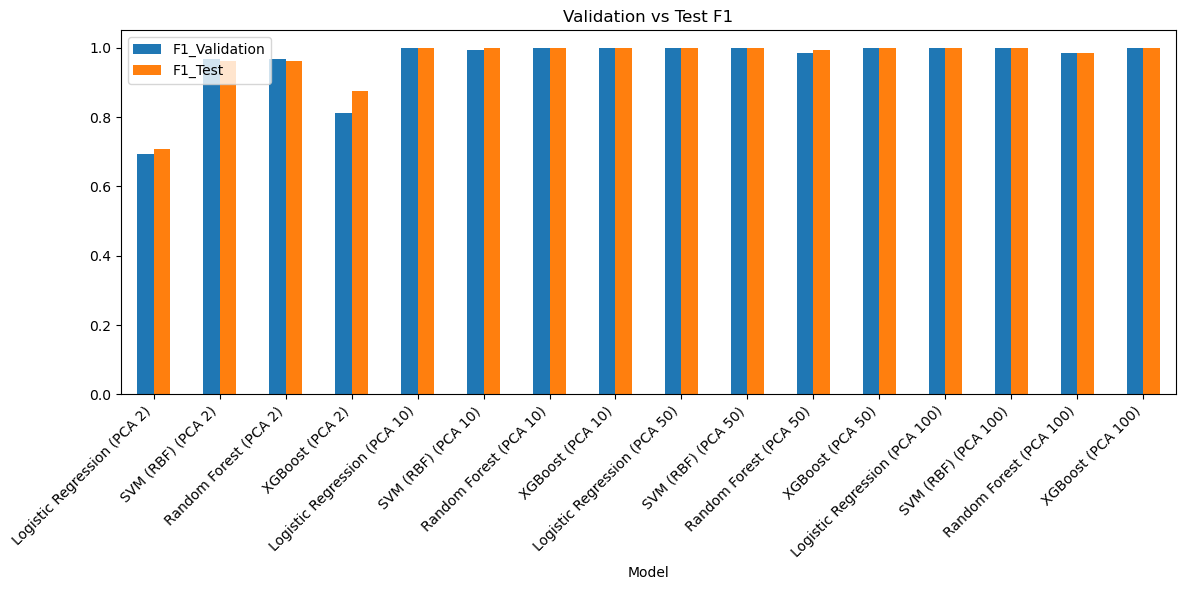

In [32]:
# Biomarker Discovery Pipeline with PCA/UMAP, Multiple Models, Tuning, Evaluation

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import umap.umap_ as umap
import matplotlib.pyplot as plt

summary_rows = []  # To collect model summaries

# -------------------------- SPLITTING --------------------------
def split_data(X, y):
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)
    return X_train, X_val, X_test, y_train, y_val, y_test

# ----------------------- REDUCTION ----------------------------
def reduce_dim(X_train, X_val, X_test, method='pca', n_components=50):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    if method == 'pca':
        reducer = PCA(n_components=n_components, random_state=42)
    else:
        reducer = umap.UMAP(n_neighbors=15, min_dist=0.10, n_components=n_components, random_state=42)

    X_train_red = reducer.fit_transform(X_train_scaled)
    X_val_red = reducer.transform(X_val_scaled)
    X_test_red = reducer.transform(X_test_scaled)

    return X_train_red, X_val_red, X_test_red, reducer

# ---------------------- MODEL + TUNING ------------------------
def evaluate_model(name, model, X_train, y_train, X_val, y_val, X_test, y_test):
    model.fit(X_train, y_train)

    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    f1_val = f1_score(y_val, y_val_pred)
    f1_test = f1_score(y_test, y_test_pred)
    overfit_flag = 'Yes' if abs(f1_val - f1_test) > 0.1 else 'No'

    summary_rows.append({
        "Model": name,
        "Best Params": model.best_params_,
        "F1_Validation": f1_val,
        "F1_Test": f1_test,
        "Overfitting": overfit_flag
    })

    print(f"\n\033[1m{name} - Validation Report\033[0m")
    print(classification_report(y_val, y_val_pred))
    print("Confusion Matrix (Validation):")
    print(confusion_matrix(y_val, y_val_pred))

    print(f"\n\033[1m{name} - Test Report\033[0m")
    print(classification_report(y_test, y_test_pred))
    print("Confusion Matrix (Test):")
    print(confusion_matrix(y_test, y_test_pred))

    # Feature importance if available
    if hasattr(model.best_estimator_, "feature_importances_"):
        importances = model.best_estimator_.feature_importances_
        top_idx = np.argsort(importances)[::-1][:10]
        print("Top 10 Important Features (index):", top_idx)
        print("Importances:", importances[top_idx])

# --------------------------- MAIN -----------------------------
def run_all(X, y, method='pca'):
    X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y)
    f1_pca_track = {}

    for n_components in [2, 10, 50, 100]:
        print(f"\n\n================ Dim Reduction: {method.upper()} - Components = {n_components} ================")
        X_train_red, X_val_red, X_test_red, reducer = reduce_dim(X_train, X_val, X_test, method, n_components)

        models = {
            "Logistic Regression": GridSearchCV(LogisticRegression(class_weight='balanced', max_iter=1000),
                                                param_grid={"C": [0.01, 0.1, 1, 10]},
                                                scoring='f1', cv=5),

            "SVM (RBF)": GridSearchCV(SVC(class_weight='balanced', probability=True),
                                      param_grid={"C": [0.1, 1, 10], "gamma": ['scale', 'auto']},
                                      scoring='f1', cv=5),

            "Random Forest": GridSearchCV(RandomForestClassifier(class_weight='balanced'),
                                          param_grid={"n_estimators": [100, 200], "max_depth": [None, 10]},
                                          scoring='f1', cv=5),

            "XGBoost": GridSearchCV(XGBClassifier(scale_pos_weight=(sum(y_train == 0) / sum(y_train == 1)), eval_metric='logloss'),
                                     param_grid={"n_estimators": [100, 200], "max_depth": [3, 6]},
                                     scoring='f1', cv=5)
        }

        for name, model in models.items():
            full_name = f"{name} ({method.upper()} {n_components})"
            evaluate_model(full_name, model, X_train_red, y_train, X_val_red, y_val, X_test_red, y_test)
            f1_pca_track[full_name] = (summary_rows[-1]['F1_Validation'], summary_rows[-1]['F1_Test'])

    # Summary table
    # Summary table
    summary_df = pd.DataFrame(summary_rows)
    print("\n\033[1mSummary Table:\033[0m")
    print(summary_df.to_string(index=False))

    # Save summary to file
    # summary_df.to_csv("model_summary_UMAP.csv", index=False)
    # print("\nSummary saved to model_summary.csv")

    #Visualization to compare F1 scores (optional enable later)
    summary_df.plot(x='Model', y=['F1_Validation', 'F1_Test'], kind='bar', figsize=(12,6), title='Validation vs Test F1')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Example usage:
run_all(X, y, method='pca')
#run_all(X, y, method='umap')



c:\Users\amani\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


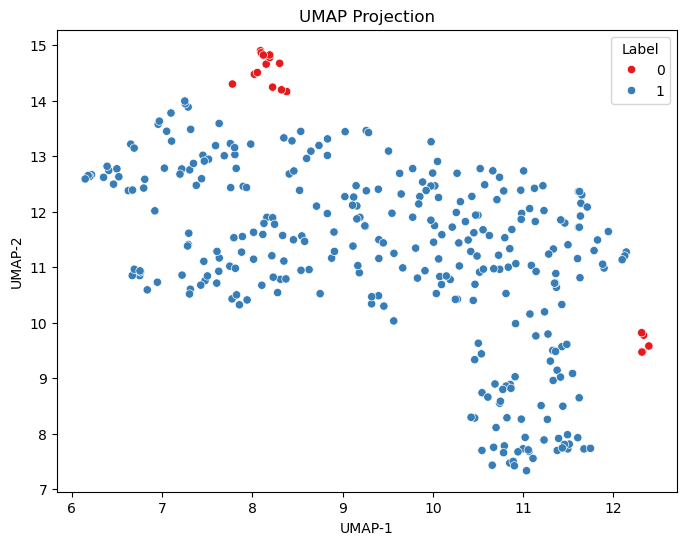

In [33]:
# umap and tsne analysis

X_1 = df.values
scaler = StandardScaler()
X_scaled_1 = scaler.fit_transform(X)

from sklearn.decomposition import PCA

pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_scaled_1)

reducer = umap.UMAP(n_neighbors=15, min_dist=0.10, n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_pca)

# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y, palette='Set1')  # labels: class labels (e.g., cancer/normal)
plt.title("UMAP Projection")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.show()

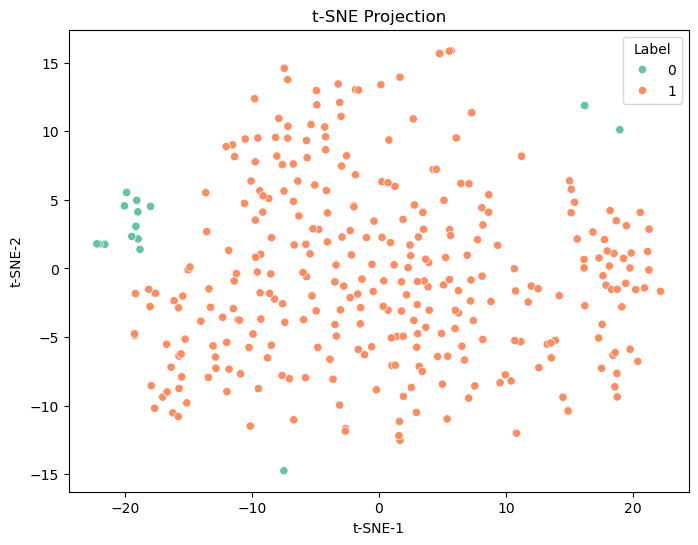

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='Set2')
plt.title("t-SNE Projection")
plt.xlabel("t-SNE-1")
plt.ylabel("t-SNE-2")
plt.show()

In [ ]:
# Biomarker Discovery Pipeline with PCA/UMAP, Multiple Models, Tuning, Evaluation

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_curve, auc, precision_recall_curve

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns

summary_rows = []  # To collect model summaries

# -------------------------- SPLITTING --------------------------
def split_data(X, y):
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)
    return X_train, X_val, X_test, y_train, y_val, y_test

# ----------------------- REDUCTION ----------------------------
def reduce_dim(X_train, X_val, X_test, method='pca', n_components=50):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    if method == 'pca':
        reducer = PCA(n_components=n_components, random_state=42)
    else:
        reducer = umap.UMAP(n_components=n_components, random_state=42)

    X_train_red = reducer.fit_transform(X_train_scaled)
    X_val_red = reducer.transform(X_val_scaled)
    X_test_red = reducer.transform(X_test_scaled)

    if method == 'pca':
        top_features = pd.DataFrame(reducer.components_, columns=X_train.columns)
        for i in range(n_components):
            print(f"Top genes for PC{i+1}:", top_features.iloc[i].abs().sort_values(ascending=False).head(100).index.tolist())

    return X_train_red, X_val_red, X_test_red, reducer

# ---------------------- PLOTTING HELPERS ----------------------
def plot_roc_pr_curves(model, X_test, y_test, model_name):
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        y_score = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_score)
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    auc_roc = auc(fpr, tpr)
    auc_pr = auc(recall, precision)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f"AUC = {auc_roc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f"AUC = {auc_pr:.2f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"PR Curve - {model_name}")
    plt.legend()

    plt.tight_layout()
    plt.savefig(f"{model_name.replace(' ', '_')}_roc_pr.png")
    plt.close()

# ---------------------- MODEL + TUNING ------------------------
def evaluate_model(name, model, X_train, y_train, X_val, y_val, X_test, y_test):
    model.fit(X_train, y_train)

    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    f1_val = f1_score(y_val, y_val_pred)
    f1_test = f1_score(y_test, y_test_pred)
    overfit_flag = 'Yes' if abs(f1_val - f1_test) > 0.1 else 'No'

    summary_rows.append({
        "Model": name,
        "Best Params": model.best_params_,
        "F1_Validation": round(f1_val, 4),
        "F1_Test": round(f1_test, 4),
        "Overfitting": overfit_flag
    })

    print(f"\n\033[1m{name} - Validation Report\033[0m")
    print(classification_report(y_val, y_val_pred))
    print("Confusion Matrix (Validation):")
    # sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, fmt='d', cmap='Blues')
    # plt.title(f"Confusion Matrix - Validation - {name}")
    # plt.savefig(f"{name.replace(' ', '_')}_val_confusion.png")
    # plt.close()

    print(f"\n\033[1m{name} - Test Report\033[0m")
    print(classification_report(y_test, y_test_pred))
    print("Confusion Matrix (Test):")
    # sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Greens')
    # plt.title(f"Confusion Matrix - Test - {name}")
    # plt.savefig(f"{name.replace(' ', '_')}_test_confusion.png")
    # plt.close()

    # plot_roc_pr_curves(model.best_estimator_, X_test, y_test, name)

    if hasattr(model.best_estimator_, "feature_importances_"):
        importances = model.best_estimator_.feature_importances_
        top_idx = np.argsort(importances)[::-1][:10]
        print("Top 10 Important Features (index):", top_idx)
        print("Importances:", importances[top_idx])

# --------------------------- MAIN -----------------------------
def run_all(X, y, method='pca'):
    X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y)
    f1_pca_track = {}

    for n_components in [3,5,15]:
        print(f"\n\n================ Dim Reduction: {method.upper()} - Components = {n_components} ================")
        X_train_red, X_val_red, X_test_red, reducer = reduce_dim(X_train, X_val, X_test, method, n_components)

        models = {
            "Logistic Regression": GridSearchCV(LogisticRegression(class_weight='balanced', max_iter=1000),
                                                param_grid={"C": [0.01, 0.1, 1, 10]},
                                                scoring='f1', cv=5),

            "SVM (RBF)": GridSearchCV(SVC(class_weight='balanced', probability=True),
                                      param_grid={"C": [0.1, 1, 10], "gamma": ['scale', 'auto']},
                                      scoring='f1', cv=5),

            "Random Forest": GridSearchCV(RandomForestClassifier(class_weight='balanced'),
                                          param_grid={"n_estimators": [100, 200], "max_depth": [None, 10]},
                                          scoring='f1', cv=5),

            "XGBoost": GridSearchCV(XGBClassifier(scale_pos_weight=(sum(y_train == 0) / sum(y_train == 1)), eval_metric='logloss'),
                                     param_grid={"n_estimators": [100, 200], "max_depth": [3, 6]},
                                     scoring='f1', cv=5)
        }

        for name, model in models.items():
            full_name = f"{name} ({method.upper()} {n_components})"
            evaluate_model(full_name, model, X_train_red, y_train, X_val_red, y_val, X_test_red, y_test)
            f1_pca_track[full_name] = (summary_rows[-1]['F1_Validation'], summary_rows[-1]['F1_Test'])

    # summary_df = pd.DataFrame(summary_rows)
    # summary_df = summary_df[["Model", "Best Params", "F1_Validation", "F1_Test", "Overfitting"]]
    # print("\n\033[1mSummary Table:\033[0m")
    # print(summary_df.to_string(index=False))
    # summary_df.to_csv("model_summary.csv", index=False)

    # with open("model_summary.txt", "w") as f:
    #     f.write("Biomarker Discovery Model Performance Summary\n")
    #     f.write("="*50 + "\n")
    #     f.write(summary_df.to_string(index=False))
    #     f.write("\n\nLegend:\n")
    #     f.write("F1_Validation - F1 Score on Validation Split\n")
    #     f.write("F1_Test - F1 Score on Test Split\n")
    #     f.write("Overfitting - Flag if model performance drops heavily from val to test\n")

    #Plot performance vs PCA dimensions
    # plt.figure(figsize=(10, 5))
    # for model in summary_df['Model'].unique():
    #     if 'PCA' in model:
    #         dim = int(model.split()[-1])
    #         plt.scatter(dim, summary_df[summary_df['Model'] == model]['F1_Test'], label=model)
    # plt.xlabel("Number of PCA Components")
    # plt.ylabel("F1 Score (Test)")
    # plt.title("Performance Across PCA Dimensions")
    # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    # plt.tight_layout()
    # plt.savefig("pca_f1_performance.png")
    # plt.close()

    # print("\nSummary and plots saved.")
run_all(X,y,method="pca")



================ Dim Reduction: PCA - Components = 3 ================
Top genes for PC1: ['FBXO21', 'VEZF1', 'CPSF6', 'TMEM131', 'SNRNP200', 'APPBP2', 'PI4KA', 'KAT7', 'RBM12', 'TMEM184C', 'THRAP3', 'BCLAF1', 'PHF12', 'SMARCA5', 'TP53BP1', 'TRIM37', 'FOXJ3', 'GOSR1', 'ZNF445', 'RBMX', 'GXYLT1', 'ZMYM4', 'BRPF3', 'DCAF7', 'DIDO1', 'ROCK1', 'TCF12', 'NCOA5', 'BPTF', 'ALMS1', 'MED23', 'ZNF664', 'CDC40', 'THUMPD1', 'MBTD1', 'DDX46', 'RTL6', 'YLPM1', 'C2orf49', 'RNF41', 'BRD3', 'RIC8B', 'ANKRD40', 'FBXW8', 'ZNF638', 'DHX9', 'CIPC', 'DDX17', 'CNNM3', 'KANSL1', 'EP400', 'RUSF1', 'HNRNPLL', 'METTL14', 'DNAJC14', 'ZBTB14', 'ADNP', 'SMARCC2', 'TTC21B', 'KDM3B', 'MTR', 'PREPL', 'EPC2', 'WDR73', 'NEK1', 'SEC23IP', 'SF3B1', 'G3BP2', 'CTCF', 'PHF3', 'REV3L', 'COG2', 'RBBP4', 'CASC3', 'SART3', 'ZYG11B', 'KBTBD4', 'ZMYND11', 'IFT81', 'CLCC1', 'RANBP2', 'WDR33', 'KLHDC2', 'DDB1', 'DCAF16', 'SP2', 'NEK4', 'SUZ12', 'EPB41', 'GANAB', 'RBM12B', 'HIPK1', 'ERCC3', 'GCC2', 'SNRPD3', 'UBXN2B', 'TNRC6B', 'ZFR

c:\Users\amani\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\amani\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\amani\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\amani\anaconda3\Lib\site-packag


Random Forest (PCA 3) - Validation Report
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.97      0.98      0.98        62

    accuracy                           0.95        66
   macro avg       0.82      0.74      0.77        66
weighted avg       0.95      0.95      0.95        66

Confusion Matrix (Validation):

Random Forest (PCA 3) - Test Report
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.98      1.00      0.99        62

    accuracy                           0.98        66
   macro avg       0.99      0.88      0.92        66
weighted avg       0.99      0.98      0.98        66

Confusion Matrix (Test):
Top 10 Important Features (index): [2 1 0]
Importances: [0.65605508 0.17462121 0.16932371]

XGBoost (PCA 3) - Validation Report
              precision    recall  f1-score   support

           0       0.25    

NameError: name 'summary_df' is not defined

<Figure size 1000x500 with 0 Axes>

In [60]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns

summary_rows = []  # To collect model summaries

# -------------------------- SPLITTING --------------------------
def split_data(X, y):
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)
    return X_train, X_val, X_test, y_train, y_val, y_test

# ----------------------- REDUCTION ----------------------------
def reduce_dim(X_train, X_val, X_test, method='pca', n_components=50):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    if method == 'pca':
        reducer = PCA(n_components=n_components, random_state=42)
    else:
        reducer = umap.UMAP(n_components=n_components, random_state=42)

    X_train_red = reducer.fit_transform(X_train_scaled)
    X_val_red = reducer.transform(X_val_scaled)
    X_test_red = reducer.transform(X_test_scaled)

    if method == 'pca':
        top_features = pd.DataFrame(reducer.components_, columns=X_train.columns)
        for i in range(n_components):
            print(f"Top genes for PC{i+1}:", top_features.iloc[i].abs().sort_values(ascending=False).head(100).index.tolist())

    return X_train_red, X_val_red, X_test_red, reducer

# ---------------------- PLOTTING HELPERS ----------------------
def plot_roc_pr_curves(model, X_test, y_test, model_name):
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        y_score = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_score)
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    auc_roc = auc(fpr, tpr)
    auc_pr = auc(recall, precision)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f"AUC = {auc_roc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f"AUC = {auc_pr:.2f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"PR Curve - {model_name}")
    plt.legend()

    plt.tight_layout()
    plt.savefig(f"{model_name.replace(' ', '_')}_roc_pr.png")
    plt.close()

# ---------------------- MODEL + TUNING ------------------------
def evaluate_model(name, model, X_train, y_train, X_val, y_val, X_test, y_test):
    model.fit(X_train, y_train)

    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    # Validate predictions contain all classes
    val_classes = np.unique(y_val_pred)
    test_classes = np.unique(y_test_pred)
    if len(val_classes) < len(np.unique(y_val)) or len(test_classes) < len(np.unique(y_test)):
        print(f"Warning: {name} predictions missing some classes. Adjusting zero_division.")
        zero_division = 0
    else:
        zero_division = None

    f1_val = f1_score(y_val, y_val_pred)
    f1_test = f1_score(y_test, y_test_pred)
    overfit_flag = 'Yes' if abs(f1_val - f1_test) > 0.1 else 'No'

    summary_rows.append({
        "Model": name,
        "Best Params": model.best_params_,
        "F1_Validation": round(f1_val, 4),
        "F1_Test": round(f1_test, 4),
        "Overfitting": overfit_flag
    })

    print(f"\n\033[1m{name} - Validation Report\033[0m")
    print(classification_report(y_val, y_val_pred, zero_division=zero_division))
    print("Confusion Matrix (Validation):")
    # sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, fmt='d', cmap='Blues')
    # plt.title(f"Confusion Matrix - Validation - {name}")
    # plt.savefig(f"{name.replace(' ', '_')}_val_confusion.png")
    # plt.close()

    print(f"\n\033[1m{name} - Test Report\033[0m")
    print(classification_report(y_test, y_test_pred, zero_division=zero_division))
    print("Confusion Matrix (Test):")
    # sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Greens')
    # plt.title(f"Confusion Matrix - Test - {name}")
    # plt.savefig(f"{name.replace(' ', '_')}_test_confusion.png")
    # plt.close()

    plot_roc_pr_curves(model.best_estimator_, X_test, y_test, name)

    if hasattr(model.best_estimator_, "feature_importances_"):
        importances = model.best_estimator_.feature_importances_
        top_idx = np.argsort(importances)[::-1][:10]
        print("Top 10 Important Features (index):", top_idx)
        print("Importances:", importances[top_idx])

# --------------------------- MAIN -----------------------------
def run_all(X, y, method='pca'):
    X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y)
    f1_pca_track = {}

    for n_components in [3, 5, 15]:
        print(f"\n\n================ Dim Reduction: {method.upper()} - Components = {n_components} ================")
        X_train_red, X_val_red, X_test_red, reducer = reduce_dim(X_train, X_val, X_test, method, n_components)

        models = {
            "Logistic Regression": GridSearchCV(LogisticRegression(class_weight='balanced', max_iter=1000),
                                                param_grid={"C": [0.01, 0.1, 1, 10]},
                                                scoring='f1', cv=5),

            "SVM (RBF)": GridSearchCV(SVC(class_weight='balanced', probability=True),
                                      param_grid={"C": [0.1, 1, 10], "gamma": ['scale', 'auto']},
                                      scoring='f1', cv=5),

            "Random Forest": GridSearchCV(RandomForestClassifier(class_weight='balanced'),
                                          param_grid={"n_estimators": [100, 200], "max_depth": [None, 10]},
                                          scoring='f1', cv=5),

            "XGBoost": GridSearchCV(XGBClassifier(scale_pos_weight=(sum(y_train == 0) / sum(y_train == 1)), eval_metric='logloss'),
                                     param_grid={"n_estimators": [100, 200], "max_depth": [3, 6]},
                                     scoring='f1', cv=5)
        }

        for name, model in models.items():
            full_name = f"{name} ({method.upper()} {n_components})"
            evaluate_model(full_name, model, X_train_red, y_train, X_val_red, y_val, X_test_red, y_test)
            f1_pca_track[full_name] = (summary_rows[-1]['F1_Validation'], summary_rows[-1]['F1_Test'])

    summary_df = pd.DataFrame(summary_rows)
    summary_df = summary_df[["Model", "Best Params", "F1_Validation", "F1_Test", "Overfitting"]]
    print("\n\033[1mSummary Table:\033[0m")
    # print(summary_df.to_string(index=False))
    # summary_df.to_csv("model_summary.csv", index=False)

    # with open("model_summary.txt", "w") as f:
    #     f.write("Biomarker Discovery Model Performance Summary\n")
    #     f.write("="*50 + "\n")
    #     f.write(summary_df.to_string(index=False))
    #     f.write("\n\nLegend:\n")
    #     f.write("F1_Validation - F1 Score on Validation Split\n")
    #     f.write("F1_Test - F1 Score on Test Split\n")
    #     f.write("Overfitting - Flag if model performance drops heavily from val to test\n")

    # Plot performance vs PCA dimensions
    # plt.figure(figsize=(10, 5))
    # for model in summary_df['Model'].unique():
    #     if 'PCA' in model:
    #         dim = int(model.split()[-1])
    #         plt.scatter(dim, summary_df[summary_df['Model'] == model]['F1_Test'], label=model)
    # plt.xlabel("Number of PCA Components")
    # plt.ylabel("F1 Score (Test)")
    # plt.title("Performance Across PCA Dimensions")
    # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    # plt.tight_layout()
    # plt.savefig("pca_f1_performance.png")
    # plt.close()

    # print("\nSummary and plots saved.")

run_all(X, y, method="pca")



================ Dim Reduction: PCA - Components = 3 ================
Top genes for PC1: ['FBXO21', 'VEZF1', 'CPSF6', 'TMEM131', 'SNRNP200', 'APPBP2', 'PI4KA', 'KAT7', 'RBM12', 'TMEM184C', 'THRAP3', 'BCLAF1', 'PHF12', 'SMARCA5', 'TP53BP1', 'TRIM37', 'FOXJ3', 'GOSR1', 'ZNF445', 'RBMX', 'GXYLT1', 'ZMYM4', 'BRPF3', 'DCAF7', 'DIDO1', 'ROCK1', 'TCF12', 'NCOA5', 'BPTF', 'ALMS1', 'MED23', 'ZNF664', 'CDC40', 'THUMPD1', 'MBTD1', 'DDX46', 'RTL6', 'YLPM1', 'C2orf49', 'RNF41', 'BRD3', 'RIC8B', 'ANKRD40', 'FBXW8', 'ZNF638', 'DHX9', 'CIPC', 'DDX17', 'CNNM3', 'KANSL1', 'EP400', 'RUSF1', 'HNRNPLL', 'METTL14', 'DNAJC14', 'ZBTB14', 'ADNP', 'SMARCC2', 'TTC21B', 'KDM3B', 'MTR', 'PREPL', 'EPC2', 'WDR73', 'NEK1', 'SEC23IP', 'SF3B1', 'G3BP2', 'CTCF', 'PHF3', 'REV3L', 'COG2', 'RBBP4', 'CASC3', 'SART3', 'ZYG11B', 'KBTBD4', 'ZMYND11', 'IFT81', 'CLCC1', 'RANBP2', 'WDR33', 'KLHDC2', 'DDB1', 'DCAF16', 'SP2', 'NEK4', 'SUZ12', 'EPB41', 'GANAB', 'RBM12B', 'HIPK1', 'ERCC3', 'GCC2', 'SNRPD3', 'UBXN2B', 'TNRC6B', 'ZFR

InvalidParameterError: The 'zero_division' parameter of classification_report must be a float among {0.0, 1.0}, numpy.nan or a str among {'warn'}. Got None instead.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import shap
import statsmodels.stats.multitest as smm
import tensorflow as tf
#from tensorflow.keras import layers, models

# ---------------------------
# 1. Differential Expression
# ---------------------------
# def differential_expression(X, y, alpha=0.05, logfc_threshold=1.0):
#     """
#     X: DataFrame (samples x genes), y: binary labels (0/1)
#     Returns genes passing FDR and logFC thresholds.
#     """
#     classes = np.unique(y)
#     group0 = X[y == classes[0]]
#     group1 = X[y == classes[1]]
#     logfc = np.log2(group1.mean()+1e-9) - np.log2(group0.mean()+1e-9)
#     # t-test
#     from scipy.stats import ttest_ind
#     pvals = X.apply(lambda g: ttest_ind(group1[g.name], group0[g.name], equal_var=False).pvalue)
#     _, pvals_fdr, _, _ = smm.multipletests(pvals, alpha=alpha, method='fdr_bh')
#     selected = X.columns[(abs(logfc) >= logfc_threshold) & (pvals_fdr < alpha)]
#     return selected.tolist()

# -------------------------------------
# 2. mRMR (using mutual_info_classif)
# -------------------------------------
# def mrmr_selection(X, y, k=50):
#     """
#     Select k genes using mRMR heuristic.
#     """
#     from sklearn.feature_selection import mutual_info_classif
#     mi = mutual_info_classif(X, y)
#     selected = []
#     remaining = list(X.columns)
#     for _ in range(k):
#         scores = {}
#         for gene in remaining:
#             relevance = mi[X.columns.get_loc(gene)]
#             redundancy = np.mean([mutual_info_classif(X[[gene]], X[sel])[0] for sel in selected]) if selected else 0
#             scores[gene] = relevance - redundancy
#         best = max(scores, key=scores.get)
#         selected.append(best)
#         remaining.remove(best)
#     return selected

# ----------------------------
# 3. Recursive Feature Elim.
# ----------------------------
def rfe_selection(X, y, estimator=None, n_features=100):
    """
    Uses RFE to select top n_features.
    """
    if estimator is None:
        estimator = RandomForestClassifier(n_estimators=100, random_state=42)
    selector = RFE(estimator, n_features_to_select=n_features, step=0.1)
    selector = selector.fit(X, y)
    return list(X.columns[selector.support_])

# ----------------------------
# 4. LASSO / Elastic Net
# ----------------------------
# def lasso_selection(X, y, cv=5, penalty='l1', Cs=10):
#     """
#     Fits LogisticRegressionCV with l1 or elasticnet. Returns non-zero coef genes.
#     """
#     lr = LogisticRegressionCV(
#         Cs=Cs, cv=cv, penalty=penalty, solver='saga', l1_ratios=[0.5] if penalty=='elasticnet' else None,
#         scoring='roc_auc', max_iter=5000, random_state=42
#     )
#     lr.fit(X, y)
#     coef = pd.Series(np.mean(np.abs(lr.coef_), axis=0), index=X.columns)
#     return list(coef[coef > 1e-6].index)

# ----------------------------
# 5. Tree-Based Importances
# ----------------------------
# def tree_importance_selection(X, y, model='rf', top_n=50):
#     """
#     Returns top_n genes by importance from RandomForest or XGBoost.
#     """
#     if model == 'rf':
#         clf = RandomForestClassifier(n_estimators=200, random_state=42)
#         clf.fit(X, y)
#         imp = pd.Series(clf.feature_importances_, index=X.columns)
#     else:
#         clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
#         clf.fit(X, y)
#         imp = pd.Series(clf.feature_importances_, index=X.columns)
#     return list(imp.sort_values(ascending=False).head(top_n).index)

# ----------------------------
# 6. SHAP Values
# ----------------------------
# def shap_selection(X, y, model=None, top_n=50):
#     """
#     Fits model and returns genes with highest mean(|SHAP|).
#     """
#     if model is None:
#         model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
#     model.fit(X, y)
#     explainer = shap.Explainer(model, X)
#     shap_vals = explainer(X)
#     mean_abs = np.abs(shap_vals.values).mean(axis=0)
#     imp = pd.Series(mean_abs, index=X.columns)
#     return list(imp.sort_values(ascending=False).head(top_n).index)

# ----------------------------
# 7. Autoencoder Attribution
# ----------------------------
# def autoencoder_attribution(X, n_hidden=50, top_n=50):
#     """
#     Trains simple autoencoder and attributes via gradient.
#     """
#     input_dim = X.shape[1]
#     inp = layers.Input(shape=(input_dim,))
#     encoded = layers.Dense(n_hidden, activation='relu')(inp)
#     decoded = layers.Dense(input_dim, activation='sigmoid')(encoded)
#     autoenc = models.Model(inp, decoded)
#     autoenc.compile(optimizer='adam', loss='mse')
#     autoenc.fit(X, X, epochs=50, batch_size=16, verbose=0)
#     # Gradient-based attributions
#     import tensorflow.keras.backend as K
#     grads = K.gradients(autoenc.output, inp)[0]
#     func = K.function([inp], [grads])
#     grad_vals = func([X])[0]
#     scores = np.mean(np.abs(grad_vals), axis=0)
#     imp = pd.Series(scores, index=X.columns)
#     return list(imp.sort_values(ascending=False).head(top_n).index)

# ----------------------------
# Example Usage on Your Data
# ----------------------------
# Load your data: assume 'data.csv' with shape (328, gene_count+1) where 'label' column is 0/1
# df = pd.read_csv('data.csv')
# # Standardize
scaler = StandardScaler()
# X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# # Split if needed
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


# # Apply methods
# de_genes = differential_expression(X_train, y_train)
# mrmr_genes = mrmr_selection(X_train, y_train, k=100)
rfe_genes = rfe_selection(X_train, y_train, n_features=100)
# lasso_genes = lasso_selection(X_train, y_train)
# rf_genes = tree_importance_selection(X_train, y_train, model='rf', top_n=100)
# shap_genes = shap_selection(X_train, y_train, top_n=100)
# ae_genes = autoencoder_attribution(X_train, n_hidden=100, top_n=100)

# # Intersection or union of lists to find consensus biomarkers:
# from functools import reduce
# consensus = list(reduce(set.intersection, map(set, [de_genes, mrmr_genes, rfe_genes, lasso_genes, rf_genes, shap_genes, ae_genes])))
# print("Consensus genes:", consensus)


Top genes selected: ['MIR3654', 'PGAM2', 'LINC02878', 'ACSF3', 'TREX1', 'PURA', 'HMSD', 'KRT19P2', 'TMCO4', 'MIR3916'] ...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Params: {'class_weight': 'balanced', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

--- Evaluation ---
Train Accuracy: 1.0
Test Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        93

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99



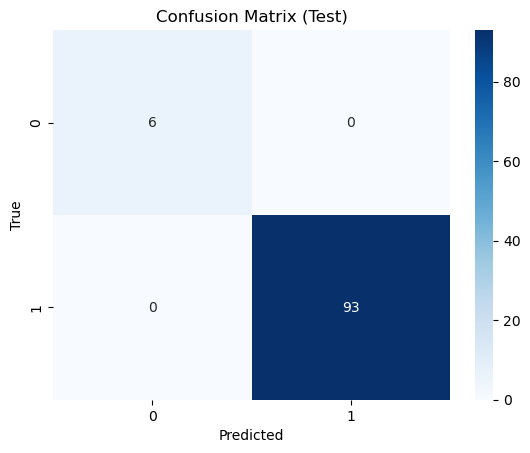

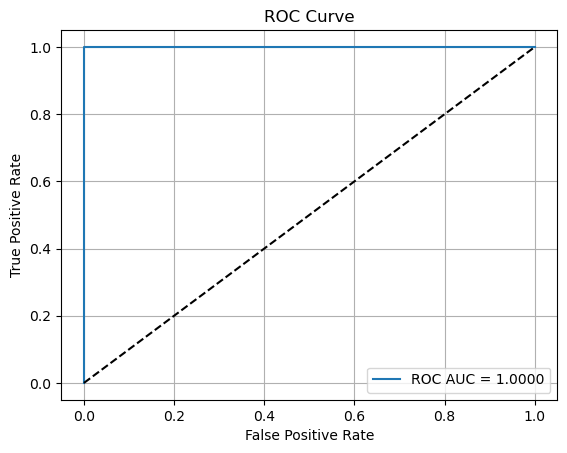

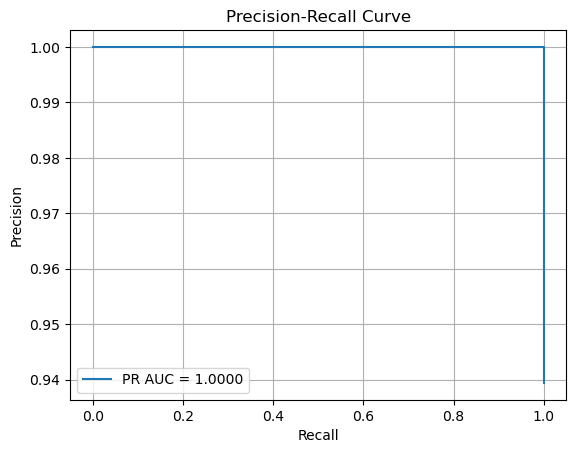

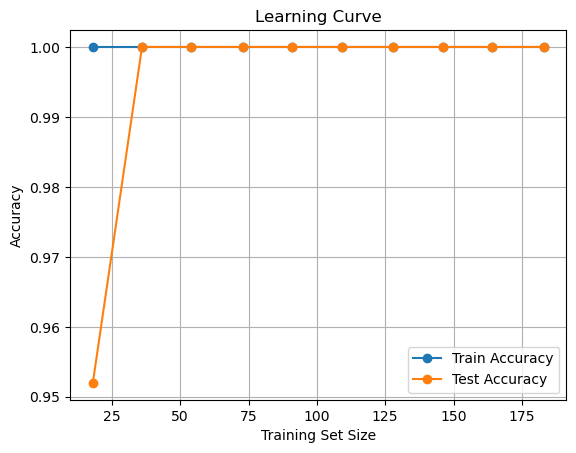

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             roc_curve, auc, precision_recall_curve, roc_auc_score)
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# 1. Train-test split & scaling
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----------------------------
# 2. Feature selection (RFE)
# ----------------------------
base_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
rfe = RFE(base_model, n_features_to_select=100, step=0.1)
rfe.fit(X_train_scaled, y_train)

X_train_sel = rfe.transform(X_train_scaled)
X_test_sel = rfe.transform(X_test_scaled)
selected_genes = X.columns[rfe.support_].tolist()
print("Top genes selected:", selected_genes[:10], "...")

# ----------------------------
# 3. Hyperparameter tuning
# ----------------------------
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}
grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train_sel, y_train)
best_model = grid.best_estimator_
print("Best Params:", grid.best_params_)

# ----------------------------
# 4. Final evaluation
# ----------------------------
train_preds = best_model.predict(X_train_sel)
test_preds = best_model.predict(X_test_sel)
test_probs = best_model.predict_proba(X_test_sel)[:, 1]

print("\n--- Evaluation ---")
print("Train Accuracy:", accuracy_score(y_train, train_preds))
print("Test Accuracy:", accuracy_score(y_test, test_preds))
print("\nClassification Report:\n", classification_report(y_test, test_preds))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, test_preds), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Test)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, test_probs)
roc_auc = roc_auc_score(y_test, test_probs)
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, test_probs)
pr_auc = auc(recall, precision)
plt.plot(recall, precision, label=f"PR AUC = {pr_auc:.4f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------
# 5. Learning Curve
# ----------------------------
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train_sel, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', label='Train Accuracy')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Test Accuracy')
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [19]:
X_train_sel.shape


(229, 100)

Top selected genes: ['ABCC5', 'ABHD4', 'ACADL', 'ACBD7', 'ACSBG1', 'ACSS3', 'ADGRF1', 'ADH7', 'ADHFE1', 'AGL', 'AGPS', 'ALOX12B', 'ALOX15B', 'AMPD3', 'ANGPTL8', 'APOA1', 'APOE', 'ART4', 'ASIP', 'BCL2', 'CCS', 'CD38', 'CHIA', 'CHRNA7', 'CMPK1', 'COMT', 'CREM', 'CSAD', 'CYP11A1', 'CYP27B1', 'CYP2C9', 'CYP2D6', 'CYP4F8', 'DEGS1', 'DGKZ', 'DGUOK', 'DHFR2', 'DLAT', 'DLST', 'DNAJC15', 'DNASE1L1', 'DNASE2B', 'DPEP2', 'DUOXA1', 'EBPL', 'ECHDC2', 'ECHDC3', 'EDEM2', 'EDN1', 'EDNRB'] ...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'class_weight': 'balanced', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

--- Accuracy Scores ---
Train Accuracy: 1.0
Validation Accuracy: 0.9696969696969697
Test Accuracy: 0.9696969696969697
Validation F1: 0.8253968253968254
Test F1: 0.8253968253968254


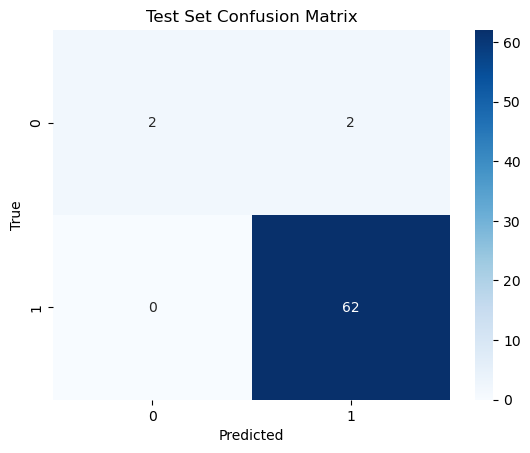

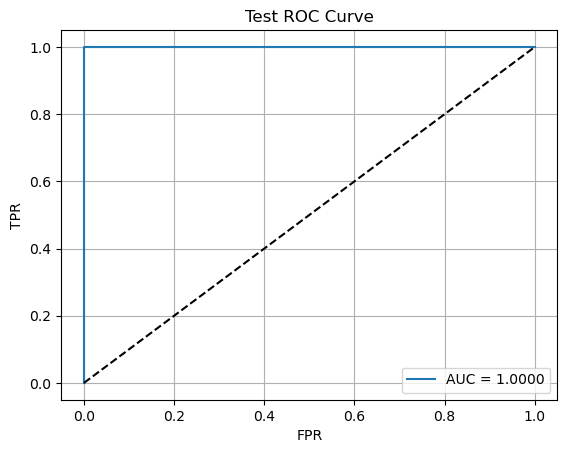

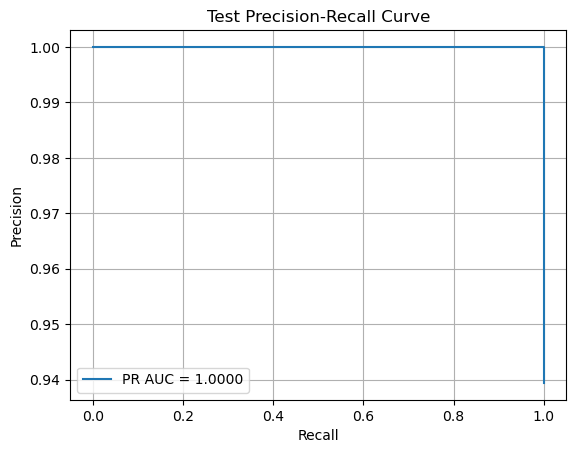

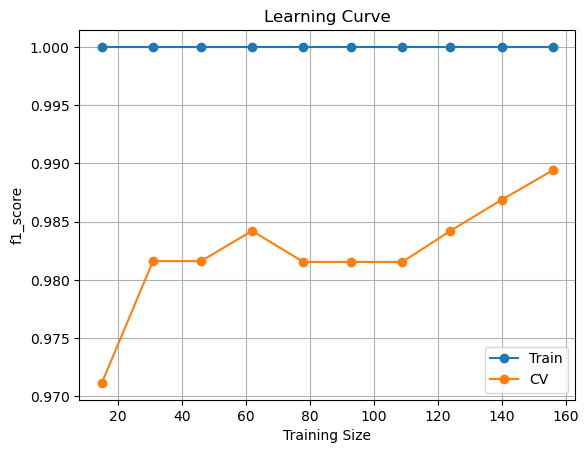

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, auc, precision_recall_curve, roc_auc_score, f1_score
)

# 1. 60-20-20 split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

# 2. Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# 3. RFE on training set
base_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rfe = RFE(base_model, n_features_to_select=200, step=0.1)
rfe.fit(X_train_scaled, y_train)

X_train_sel = rfe.transform(X_train_scaled)
X_val_sel = rfe.transform(X_val_scaled)
X_test_sel = rfe.transform(X_test_scaled)
selected_genes = X.columns[rfe.support_].tolist()
print(f"Top selected genes: {selected_genes[:50]} ...")

# 4. GridSearchCV only on training set
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}
grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42,class_weight="balanced"),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train_sel, y_train)
best_model = grid.best_estimator_
print("Best parameters:", grid.best_params_)

# 5. Evaluate on Train, Validation, Test
y_train_pred = best_model.predict(X_train_sel)
y_val_pred = best_model.predict(X_val_sel)
y_test_pred = best_model.predict(X_test_sel)

y_val_prob = best_model.predict_proba(X_val_sel)[:, 1]
y_test_prob = best_model.predict_proba(X_test_sel)[:, 1]

# Accuracy scores
print("\n--- Accuracy Scores ---")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

# F1 scores
print("Validation F1:", f1_score(y_val, y_val_pred, average='macro'))
print("Test F1:", f1_score(y_test, y_test_pred, average='macro'))

# Confusion matrix on test
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Test Set Confusion Matrix")
plt.xlabel("Predicted"); plt.ylabel("True")
plt.show()

# ROC curve on test
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Test ROC Curve"); plt.xlabel("FPR"); plt.ylabel("TPR")
plt.legend(); plt.grid(True); plt.show()

# PR curve on test
precision, recall, _ = precision_recall_curve(y_test, y_test_prob)
pr_auc = auc(recall, precision)
plt.plot(recall, precision, label=f"PR AUC = {pr_auc:.4f}")
plt.title("Test Precision-Recall Curve")
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.legend(); plt.grid(True); plt.show()

# Learning curve (on training set)
train_sizes, train_scores, val_scores = learning_curve(
    best_model, X_train_sel, y_train, cv=5, scoring='f1',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label="Train")
plt.plot(train_sizes, val_scores.mean(axis=1), 'o-', label="CV")
plt.title("Learning Curve")
plt.xlabel("Training Size"); plt.ylabel("f1_score")
plt.legend(); plt.grid(True); plt.show()


In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_validate
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, f1_score, accuracy_score, roc_auc_score, confusion_matrix, classification_report
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

# ----- STEP 1: Load your dataset -----
# Assume `X` is the gene expression DataFrame and `y` is the label Series
# X = pd.read_csv("your_data.csv")
# y = pd.read_csv("your_labels.csv")

# For demonstration, simulate the shape
# X = pd.DataFrame(np.random.rand(328, 30000), columns=[f"gene_{i}" for i in range(30000)])
# y = pd.Series([1]*309 + [0]*19)  # 1 = cancer, 0 = non-cancer

# ----- STEP 2: Define Models -----
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel="linear", probability=True, random_state=42),
    "LogisticRegression": LogisticRegression(penalty="l2", max_iter=1000, solver='liblinear', random_state=42)
}

# Hyperparameter grids
param_grids = {
    "RandomForest": {
        "clf__n_estimators": [100, 200],
        "clf__max_depth": [None, 10, 20]
    },
    "SVM": {
        "clf__C": [0.1, 1, 10]
    },
    "LogisticRegression": {
        "clf__C": [0.1, 1, 10]
    }
}

# ----- STEP 3: Outer Cross-Validation -----
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store results
results_summary = []
gene_selection_counter = defaultdict(int)

for model_name, model in models.items():
    print(f"\nProcessing Model: {model_name}")
    
    # Store scores for each fold
    fold_scores = []

    for fold, (train_idx, test_idx) in enumerate(outer_cv.split(X, y)):
        print(f"  Fold {fold + 1}")
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # ----- STEP 4: Inner Pipeline -----
        # RFE inside CV
        estimator_for_rfe = RandomForestClassifier(n_estimators=100, random_state=42)
        rfe = RFE(estimator=estimator_for_rfe, n_features_to_select=100)

        pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('rfe', rfe),
            ('clf', model)
        ])

        # GridSearchCV on inner training set
        grid = GridSearchCV(pipe, param_grids[model_name], cv=3, scoring='f1', n_jobs=-1)
        grid.fit(X_train, y_train)

        # Best model on test fold
        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_test)
        y_proba = best_model.predict_proba(X_test)[:, 1]

        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_proba)

        fold_scores.append((acc, f1, auc))

        # Track selected features
        support_mask = best_model.named_steps['rfe'].support_
        selected_genes = X.columns[support_mask]
        for gene in selected_genes:
            gene_selection_counter[gene] += 1

    # Average scores for model
    accs, f1s, aucs = zip(*fold_scores)
    results_summary.append({
        'Model': model_name,
        'Mean_Accuracy': np.mean(accs),
        'Mean_F1': np.mean(f1s),
        'Mean_AUC': np.mean(aucs)
    })

# ----- STEP 5: Output Summary -----
print("\n===== Final Model Performance Summary =====")
df_results = pd.DataFrame(results_summary)
print(df_results)

# ----- STEP 6: Stable Gene Feature Selection -----
# Select most frequently selected genes
top_genes = sorted(gene_selection_counter.items(), key=lambda x: x[1], reverse=True)
top_genes_df = pd.DataFrame(top_genes, columns=["Gene", "Count"])
print("\nTop 20 Most Frequently Selected Genes:")
print(top_genes_df.head(20))

# ----- STEP 7: Plotting Performance -----
sns.barplot(data=df_results.melt(id_vars="Model"), x="Model", y="value", hue="variable")
plt.title("Model Performance (Nested CV)")
plt.ylabel("Score")
plt.show()



Processing Model: RandomForest
  Fold 1


KeyboardInterrupt: 

In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, classification_report, confusion_matrix, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict


def run_nested_cv_pca_pipeline(X, y, n_components_list=[3,5,10,15]):
    outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    results = []
    stable_genes_tracker = defaultdict(int)

    for n_components in n_components_list:
        print(f"\n==== PCA Components = {n_components} ====")

        for fold, (train_idx, test_idx) in enumerate(outer_cv.split(X, y)):
            print(f"\n-- Fold {fold + 1} --")
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

            # Standardize
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            # PCA on training data only
            pca = PCA(n_components=n_components, random_state=42)
            X_train_pca = pca.fit_transform(X_train_scaled)
            X_test_pca = pca.transform(X_test_scaled)

            # Track top genes from PCs
            loading_matrix = pd.DataFrame(np.abs(pca.components_), columns=X.columns)
            for i in range(n_components):
                top_genes = loading_matrix.iloc[i].sort_values(ascending=False).head(20).index
                for gene in top_genes:
                    stable_genes_tracker[gene] += 1

            # Models to test
            models = {
                "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000),
                "SVM (RBF)": SVC(class_weight='balanced', kernel='rbf', probability=True),
                "Random Forest": RandomForestClassifier(class_weight='balanced'),
                "XGBoost": XGBClassifier(eval_metric='logloss', scale_pos_weight=(sum(y_train==0)/sum(y_train==1)))
            }

            param_grids = {
                "Logistic Regression": {"C": [0.01, 0.1, 1, 10]},
                "SVM (RBF)": {"C": [0.1, 1, 10], "gamma": ['scale', 'auto']},
                "Random Forest": {"n_estimators": [100, 200], "max_depth": [None, 10]},
                "XGBoost": {"n_estimators": [100, 200], "max_depth": [3, 6]}
            }

            for model_name, model in models.items():
                grid = GridSearchCV(model, param_grids[model_name], scoring='f1', cv=3)
                grid.fit(X_train_pca, y_train)
                best_model = grid.best_estimator_

                y_pred = best_model.predict(X_test_pca)
                f1 = f1_score(y_test, y_pred)
                roc = roc_auc_score(y_test, best_model.predict_proba(X_test_pca)[:,1]) if hasattr(best_model, 'predict_proba') else None

                cm = confusion_matrix(y_test, y_pred)
                print(f"{model_name} - F1: {f1:.4f}, ROC-AUC: {roc:.4f}" if roc else f"{model_name} - F1: {f1:.4f}")
                print("Confusion Matrix:\n", cm)

                results.append({
                    "Model": model_name,
                    "PCA_Components": n_components,
                    "Fold": fold+1,
                    "F1_Score": f1,
                    "ROC_AUC": roc,
                    "Best_Params": grid.best_params_
                })

    # Results summary
    df_results = pd.DataFrame(results)
    print("\n===== CV Summary =====")
    print(df_results.groupby(['Model', 'PCA_Components'])[['F1_Score', 'ROC_AUC']].mean().round(4))

    # Stable genes
    print("\nTop 20 Stable Genes Across Folds and PCs:")
    stable_genes_df = pd.DataFrame(sorted(stable_genes_tracker.items(), key=lambda x: x[1], reverse=True), columns=["Gene", "Count"])
    print(stable_genes_df.head(20))

    # Plotting F1 score vs PCA components
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df_results, x='PCA_Components', y='F1_Score', hue='Model', marker='o')
    plt.title("F1 Score vs. PCA Components")
    plt.ylabel("F1 Score")
    plt.xlabel("Number of PCA Components")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("f1_vs_pca_components.png")
    plt.close()

    # Plotting ROC AUC vs PCA components
    if df_results['ROC_AUC'].notna().all():
        plt.figure(figsize=(10, 6))
        sns.lineplot(data=df_results, x='PCA_Components', y='ROC_AUC', hue='Model', marker='s')
        plt.title("ROC AUC vs. PCA Components")
        plt.ylabel("ROC AUC")
        plt.xlabel("Number of PCA Components")
        plt.grid(True)
        plt.tight_layout()
        plt.savefig("roc_auc_vs_pca_components.png")
        plt.close()

    return df_results, stable_genes_df

run_nested_cv_pca_pipeline(X, y)


==== PCA Components = 3 ====

-- Fold 1 --
Logistic Regression - F1: 1.0000, ROC-AUC: 1.0000
Confusion Matrix:
 [[ 4  0]
 [ 0 62]]
SVM (RBF) - F1: 0.9920, ROC-AUC: 1.0000
Confusion Matrix:
 [[ 3  1]
 [ 0 62]]
Random Forest - F1: 0.9920, ROC-AUC: 1.0000
Confusion Matrix:
 [[ 3  1]
 [ 0 62]]
XGBoost - F1: 0.9920, ROC-AUC: 0.8750
Confusion Matrix:
 [[ 3  1]
 [ 0 62]]

-- Fold 2 --
Logistic Regression - F1: 0.9580, ROC-AUC: 0.9960
Confusion Matrix:
 [[ 4  0]
 [ 5 57]]
SVM (RBF) - F1: 0.9688, ROC-AUC: 0.2500
Confusion Matrix:
 [[ 0  4]
 [ 0 62]]
Random Forest - F1: 0.9764, ROC-AUC: 1.0000
Confusion Matrix:
 [[ 1  3]
 [ 0 62]]
XGBoost - F1: 0.9836, ROC-AUC: 0.9919
Confusion Matrix:
 [[ 4  0]
 [ 2 60]]

-- Fold 3 --
Logistic Regression - F1: 1.0000, ROC-AUC: 1.0000
Confusion Matrix:
 [[ 4  0]
 [ 0 62]]
SVM (RBF) - F1: 1.0000, ROC-AUC: 1.0000
Confusion Matrix:
 [[ 4  0]
 [ 0 62]]
Random Forest - F1: 1.0000, ROC-AUC: 1.0000
Confusion Matrix:
 [[ 4  0]
 [ 0 62]]
XGBoost - F1: 1.0000, ROC-AUC: 1

(                  Model  PCA_Components  Fold  F1_Score   ROC_AUC  \
 0   Logistic Regression               3     1  1.000000  1.000000   
 1             SVM (RBF)               3     1  0.992000  1.000000   
 2         Random Forest               3     1  0.992000  1.000000   
 3               XGBoost               3     1  0.992000  0.875000   
 4   Logistic Regression               3     2  0.957983  0.995968   
 ..                  ...             ...   ...       ...       ...   
 75              XGBoost              15     4  0.983607  1.000000   
 76  Logistic Regression              15     5  1.000000  1.000000   
 77            SVM (RBF)              15     5  1.000000  1.000000   
 78        Random Forest              15     5  1.000000  1.000000   
 79              XGBoost              15     5  0.983333  1.000000   
 
                                  Best_Params  
 0                                 {'C': 0.1}  
 1                 {'C': 1, 'gamma': 'scale'}  
 2   {'max_dep

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, classification_report, confusion_matrix, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict


def run_nested_cv_pca_pipeline(X, y, n_components_list=[20,50,80,150,160]):
    # Increase outer cross-validation folds to 10
    outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    results = []
    stable_genes_tracker = defaultdict(int)

    n_permutations = 20 # Number of permutations for permutation test

    for n_components in n_components_list:
        print(f"\n==== PCA Components = {n_components} ====")

        for fold, (train_idx, test_idx) in enumerate(outer_cv.split(X, y)):
            print(f"\n-- Fold {fold + 1} --")
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

            # Standardize
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            # PCA on training data only
            pca = PCA(n_components=n_components, random_state=42)
            X_train_pca = pca.fit_transform(X_train_scaled)
            X_test_pca = pca.transform(X_test_scaled)

            # Track top 100 genes from PCs
            loading_matrix = pd.DataFrame(np.abs(pca.components_), columns=X.columns)
            for i in range(n_components):
                # Extract top 100 genes instead of 20
                top_genes = loading_matrix.iloc[i].sort_values(ascending=False).head(100).index
                for gene in top_genes:
                    stable_genes_tracker[gene] += 1

            # Models to test
            models = {
                "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000),
                "SVM (RBF)": SVC(class_weight='balanced', kernel='rbf', probability=True),
                "Random Forest": RandomForestClassifier(class_weight='balanced'),
                "XGBoost": XGBClassifier(eval_metric='logloss', scale_pos_weight=(sum(y_train==0)/sum(y_train==1)))
            }

            param_grids = {
                "Logistic Regression": {"C": [0.01, 0.1, 1, 10]},
                # Increase inner cross-validation folds to 5
                "SVM (RBF)": {"C": [0.1, 1, 10], "gamma": ['scale', 'auto']},
                "Random Forest": {"n_estimators": [100, 200], "max_depth": [None, 10]},
                "XGBoost": {"n_estimators": [100, 200], "max_depth": [3, 6]}
            }

            for model_name, model in models.items():
                # Increase inner cross-validation folds to 5
                grid = GridSearchCV(model, param_grids[model_name], scoring='f1', cv=5)
                grid.fit(X_train_pca, y_train)
                best_model = grid.best_estimator_

                y_pred = best_model.predict(X_test_pca)
                f1 = f1_score(y_test, y_pred)
                roc = roc_auc_score(y_test, best_model.predict_proba(X_test_pca)[:,1]) if hasattr(best_model, 'predict_proba') else None

                cm = confusion_matrix(y_test, y_pred)
                print(f"{model_name} - F1: {f1:.4f}, ROC-AUC: {roc:.4f}" if roc else f"{model_name} - F1: {f1:.4f}")
                print("Confusion Matrix:\n", cm)

                # Permutation Test
                permutation_f1_scores = []
                for _ in range(n_permutations):
                    y_test_shuffled = np.random.permutation(y_test)
                    shuffled_f1 = f1_score(y_test_shuffled, y_pred)
                    permutation_f1_scores.append(shuffled_f1)

                avg_permutation_f1 = np.mean(permutation_f1_scores)
                print(f"[Permutation] {model_name} - F1 with shuffled labels: {avg_permutation_f1:.4f}")

                results.append({
                    "Model": model_name,
                    "PCA_Components": n_components,
                    "Fold": fold+1,
                    "F1_Score": f1,
                    "ROC_AUC": roc,
                    "Permutation_F1_Score": avg_permutation_f1, # Add permutation F1
                    "Best_Params": grid.best_params_
                })

    # Results summary
    df_results = pd.DataFrame(results)
    print("\n===== CV Summary =====")
    print(df_results.groupby(['Model', 'PCA_Components'])[['F1_Score', 'ROC_AUC', 'Permutation_F1_Score']].mean().round(4))

    # Stable genes
    # Print top 100 stable genes
    print("\nTop 100 Stable Genes Across Folds and PCs:")
    stable_genes_df = pd.DataFrame(sorted(stable_genes_tracker.items(), key=lambda x: x[1], reverse=True), columns=["Gene", "Count"])
    print(stable_genes_df.head(100)) # Ensure 100 genes are printed

     #Plotting F1 score vs PCA components
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df_results, x='PCA_Components', y='F1_Score', hue='Model', marker='o')
    plt.title("F1 Score vs. PCA Components")
    plt.ylabel("F1 Score")
    plt.xlabel("Number of PCA Components")
    plt.grid(True)
    plt.tight_layout()
    # plt.savefig("f1_vs_pca_components.png")
    plt.close()

    # Plotting ROC AUC vs PCA components
    # if df_results['ROC_AUC'].notna().all():
    #     plt.figure(figsize=(10, 6))
    #     sns.lineplot(data=df_results, x='PCA_Components', y='ROC_AUC', hue='Model', marker='s')
    #     plt.title("ROC AUC vs. PCA Components")
    #     plt.ylabel("ROC AUC")
    #     plt.xlabel("Number of PCA Components")
    #     plt.grid(True)
    #     plt.tight_layout()
    #     plt.savefig("roc_auc_vs_pca_components.png")
    #     plt.close()

    return df_results, stable_genes_df

# Assuming X and y are already defined in your environment
a,b=run_nested_cv_pca_pipeline(X, y)


==== PCA Components = 20 ====

-- Fold 1 --
Logistic Regression - F1: 0.8364, ROC-AUC: 0.4839
Confusion Matrix:
 [[ 1  1]
 [ 8 23]]
[Permutation] Logistic Regression - F1 with shuffled labels: 0.8182
SVM (RBF) - F1: 0.9836, ROC-AUC: 0.9839
Confusion Matrix:
 [[ 2  0]
 [ 1 30]]
[Permutation] SVM (RBF) - F1 with shuffled labels: 0.9262
Random Forest - F1: 0.9688, ROC-AUC: 0.9032
Confusion Matrix:
 [[ 0  2]
 [ 0 31]]
[Permutation] Random Forest - F1 with shuffled labels: 0.9688
XGBoost - F1: 0.9677, ROC-AUC: 0.5645
Confusion Matrix:
 [[ 1  1]
 [ 1 30]]
[Permutation] XGBoost - F1 with shuffled labels: 0.9403

-- Fold 2 --
Logistic Regression - F1: 0.5455, ROC-AUC: 0.4516
Confusion Matrix:
 [[ 1  1]
 [19 12]]
[Permutation] Logistic Regression - F1 with shuffled labels: 0.5636
SVM (RBF) - F1: 1.0000, ROC-AUC: 1.0000
Confusion Matrix:
 [[ 2  0]
 [ 0 31]]
[Permutation] SVM (RBF) - F1 with shuffled labels: 0.9371
Random Forest - F1: 1.0000, ROC-AUC: 1.0000
Confusion Matrix:
 [[ 2  0]
 [ 0 31]]

In [32]:
b.head(500)

,Gene,Count
0,ACSM6,613
1,ADIPOQ,611
2,SLC22A24,611
3,PPP1R3A,596
4,ACCSL,593
...,...,...
495,SERP1,292
496,CPNE7,292
497,APOA1,292
498,TSKU,292


In [34]:
print(list(b["Gene"].iloc[:30]))

['ACSM6', 'ADIPOQ', 'SLC22A24', 'PPP1R3A', 'ACCSL', 'MC2R', 'TPH2', 'SLITRK1', 'APOC4', 'MC5R', 'LGALS13', 'CTAG1B', 'PNLIP', 'ALAS2', 'TKTL1', 'INS', 'CPA1', 'PLIN1', 'AHSP', 'GPR119', 'ABHD16B', 'RDH8', 'CTAG1A', 'EPB42', 'OC90', 'GLYAT', 'UROC1', 'DAO', 'GPR12', 'IDI2']


In [1]:
l1=['PWAR5', 'MIR4665', 'SPDYE11', 'SNORD45C', 'MIR4273', 'MIR568', 'ANKRD36BP1', 'SNORD64', 'CDR1', 'ZFAT.AS1', 'MIR6716', 'MIR4784', 'MIR2110', 'MIRLET7F1', 'SNORD116.4', 'MIR632', 'MIR3198.2', 'SLC7A5P2', 'SNORD116.18', 'MIR2277', 'MIR7161', 'SPDYE8', 'MIR4800', 'MIR1204', 'MIR21', 'MIR6125', 'MIR630', 'SNORA32', 'SPDYE14', 'MIR3074', 'MIR3916', 'SNORD108', 'BMS1P21', 'SNORD107', 'MIR1260B', 'PWAR1', 'LINC00941', 'MIR421', 'SCARNA17', 'RNVU1.14', 'SNORD116.21', 'SCARNA15', 'H2AC15', 'SEBOX', 'SNORD116.14', 'MIR6506', 'NOTCH2NLB', 'OR4F3', 'SCARNA12', 'FERMT1', 'ARHGAP15', 'FBXO21', 'CPSF6', 'KAT7', 'DCAF7', 'TP53BP1', 'BPTF', 'KDM3B', 'APPBP2', 'SNRNP200', 'SMARCC2', 'FOXJ3', 'THRAP3', 'ZBTB14', 'BRD3', 'YLPM1', 'KANSL1', 'TMEM131', 'DHX9', 'GOSR1', 'TRIM37', 'GXYLT1', 'DNAJC14', 'ROCK1', 'MED23', 'MTR', 'THUMPD1', 'PRKRA', 'BCLAF1', 'PHF12', 'EPC2', 'TCF12', 'HIPK1', 'RBM12', 'SEC23IP', 'SF3B1', 'EP400', 'C2orf49', 'CDC40', 'ZNF445', 'CTCF', 'TMEM184C', 'ZMYND11', 'GMCL1', 'BRPF3', 'MBTD1', 'RNF41', 'ZMYM4', 'RBBP4', 'SART3']

In [2]:
len(l1)

100

In [3]:
import pandas as pd 

In [6]:
print(list(b["Gene"][:727]))

['PWAR5', 'MIR4665', 'SPDYE11', 'SNORD45C', 'MIR4273', 'MIR568', 'ANKRD36BP1', 'SNORD64', 'CDR1', 'ZFAT.AS1', 'MIR6716', 'MIR4784', 'MIR2110', 'MIRLET7F1', 'SNORD116.4', 'MIR632', 'MIR3198.2', 'SLC7A5P2', 'SNORD116.18', 'MIR2277', 'MIR7161', 'SPDYE8', 'MIR4800', 'MIR1204', 'MIR21', 'MIR6125', 'MIR630', 'SNORA32', 'SPDYE14', 'MIR3074', 'MIR3916', 'SNORD108', 'BMS1P21', 'SNORD107', 'MIR1260B', 'PWAR1', 'LINC00941', 'MIR421', 'SCARNA17', 'RNVU1.14', 'SNORD116.21', 'SCARNA15', 'H2AC15', 'SEBOX', 'SNORD116.14', 'MIR6506', 'NOTCH2NLB', 'OR4F3', 'SCARNA12', 'FERMT1', 'ARHGAP15', 'FBXO21', 'CPSF6', 'KAT7', 'DCAF7', 'TP53BP1', 'BPTF', 'KDM3B', 'APPBP2', 'SNRNP200', 'SMARCC2', 'FOXJ3', 'THRAP3', 'ZBTB14', 'BRD3', 'YLPM1', 'KANSL1', 'TMEM131', 'DHX9', 'GOSR1', 'TRIM37', 'GXYLT1', 'DNAJC14', 'ROCK1', 'MED23', 'MTR', 'THUMPD1', 'PRKRA', 'BCLAF1', 'PHF12', 'EPC2', 'TCF12', 'HIPK1', 'RBM12', 'SEC23IP', 'SF3B1', 'EP400', 'C2orf49', 'CDC40', 'ZNF445', 'CTCF', 'TMEM184C', 'ZMYND11', 'GMCL1', 'BRPF3', 'M

In [8]:
b["Gene"][:727].to_csv("123.csv")


>>> Processing Random Forest
Random Forest RFE + GridSearchCV: Mean F1 = 0.9368 (+/- 0.0536)

>>> Processing Logistic Regression
Logistic Regression RFE + GridSearchCV: Mean F1 = 1.0000 (+/- 0.0000)

>>> Processing SVM (Linear)
SVM (Linear) RFE + GridSearchCV: Mean F1 = 1.0000 (+/- 0.0000)

>>> Processing XGBoost
XGBoost RFE + GridSearchCV: Mean F1 = 0.9643 (+/- 0.0256)

>>> Best Model: Logistic Regression with F1 = 1.0000

--- Accuracy Scores ---
Train Accuracy: 1.0
Test Accuracy: 1.0
Test F1: 1.0


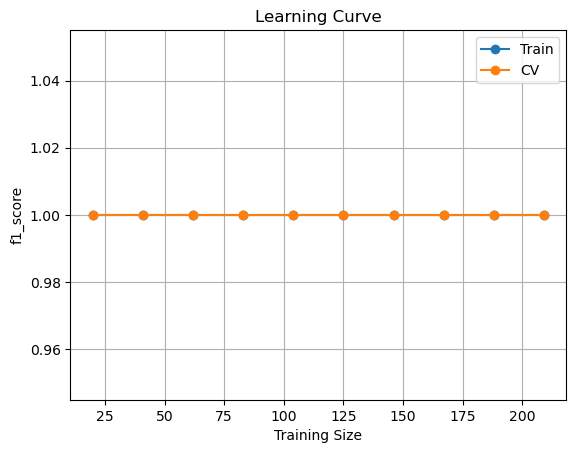

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, learning_curve, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, auc, precision_recall_curve, roc_auc_score, f1_score
)

# 1. 60-20-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


# 2. Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

# 3. RFE with Multiple Base Models and Hyperparameter Tuning
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

model_configs = {
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42,class_weight="balanced"),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [5, 10, None],
            "min_samples_split": [2, 5],
            "min_samples_leaf": [1, 2],
            "class_weight": ['balanced']
        }
    },
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000, solver='liblinear',class_weight="balanced"),
        "params": {
            "C": [0.01, 0.1, 1, 10],
            "penalty": ['l1', 'l2'],
            "class_weight": ['balanced']
        }
    },
    "SVM (Linear)": {
        "model": SVC(kernel="linear",probability=True,class_weight="balanced"),
        "params": {
            "C": [0.01, 0.1, 1, 10],
            "class_weight": ['balanced']
        }
    },
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric='logloss',scale_pos_weight=(sum(y_train==0)/sum(y_train==1)),error_score='raise'),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [3, 5, 7]
        }
    }
}

rfe_scores = {}
selected_features_per_model = {}
best_models = {}

for name, config in model_configs.items():
    print(f"\n>>> Processing {name}")
    base_model = config["model"]
    param_grid = config["params"]

    rfe = RFE(estimator=base_model, n_features_to_select=50, step=0.1)
    rfe.fit(X_train_scaled, y_train)
    selected_features = X.columns[rfe.support_].tolist()
    selected_features_per_model[name] = selected_features

    X_train_rfe = rfe.transform(X_train_scaled)
    grid = GridSearchCV(base_model, param_grid, cv=kfold, scoring='f1_macro', n_jobs=-1)
    grid.fit(X_train_rfe, y_train)
    best_models[name] = grid.best_estimator_
    scores = cross_val_score(grid.best_estimator_, X_train_rfe, y_train, cv=kfold, scoring='f1_macro', n_jobs=-1)
    rfe_scores[name] = scores
    print(f"{name} RFE + GridSearchCV: Mean F1 = {scores.mean():.4f} (+/- {scores.std():.4f})")

# 4. Automatically select the best model
best_model_name = max(rfe_scores, key=lambda k: rfe_scores[k].mean())
best_model = best_models[best_model_name]
print(f"\n>>> Best Model: {best_model_name} with F1 = {rfe_scores[best_model_name].mean():.4f}")

# Use its features for downstream pipeline
final_selected_features = selected_features_per_model[best_model_name]
X_train_sel = X_train[final_selected_features].values
X_test_sel = X_test[final_selected_features].values

# 5. Train best model
best_model.fit(X_train_sel, y_train)

# 6. Evaluate
y_train_pred = best_model.predict(X_train_sel)
y_test_pred = best_model.predict(X_test_sel)

y_test_prob = best_model.predict_proba(X_test_sel)[:, 1]

print("\n--- Accuracy Scores ---")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
#print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
#print("Validation F1:", f1_score(y_val, y_val_pred, average='macro'))
print("Test F1:", f1_score(y_test, y_test_pred, average='macro'))

# Confusion matrix on test
cm = confusion_matrix(y_test, y_test_pred)
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.title("Test Set Confusion Matrix")
# plt.xlabel("Predicted"); plt.ylabel("True")
# plt.show()

# ROC curve on test
# fpr, tpr, _ = roc_curve(y_test, y_test_prob)
# roc_auc = roc_auc_score(y_test, y_test_prob)
# plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
# plt.plot([0, 1], [0, 1], 'k--')
# plt.title("Test ROC Curve"); plt.xlabel("FPR"); plt.ylabel("TPR")
# plt.legend(); plt.grid(True); plt.show()

# PR curve on test
# precision, recall, _ = precision_recall_curve(y_test, y_test_prob)
# pr_auc = auc(recall, precision)
# plt.plot(recall, precision, label=f"PR AUC = {pr_auc:.4f}")
# plt.title("Test Precision-Recall Curve")
# plt.xlabel("Recall"); plt.ylabel("Precision")
# plt.legend(); plt.grid(True); plt.show()

# Learning curve
train_sizes, train_scores, val_scores = learning_curve(
    best_model, X_train_sel, y_train, cv=5, scoring='f1',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label="Train")
plt.plot(train_sizes, val_scores.mean(axis=1), 'o-', label="CV")
plt.title("Learning Curve")
plt.xlabel("Training Size"); plt.ylabel("f1_score")
plt.legend(); plt.grid(True); plt.show()

# Save selected genes for each model
pd.DataFrame.from_dict(selected_features_per_model, orient='index').transpose().to_csv("selected_genes_per_model_meta.csv", index=False)



>>> Processing Random Forest
Random Forest RFE + GridSearchCV: Mean F1 = 0.9653 (+/- 0.0693)

>>> Processing Logistic Regression
Logistic Regression RFE + GridSearchCV: Mean F1 = 0.9786 (+/- 0.0427)

>>> Processing SVM (Linear)
SVM (Linear) RFE + GridSearchCV: Mean F1 = 1.0000 (+/- 0.0000)

>>> Processing XGBoost
XGBoost RFE + GridSearchCV: Mean F1 = 0.9226 (+/- 0.0677)


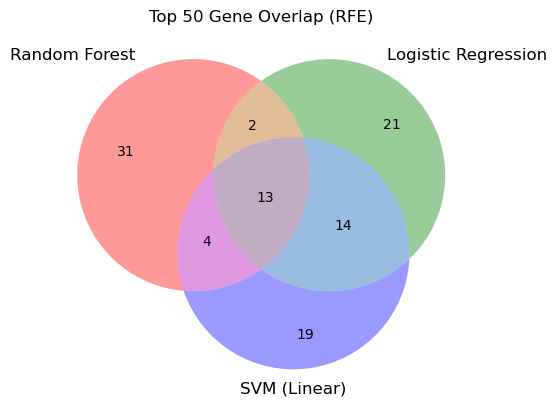


>>> Best Model: SVM (Linear) with F1 = 1.0000


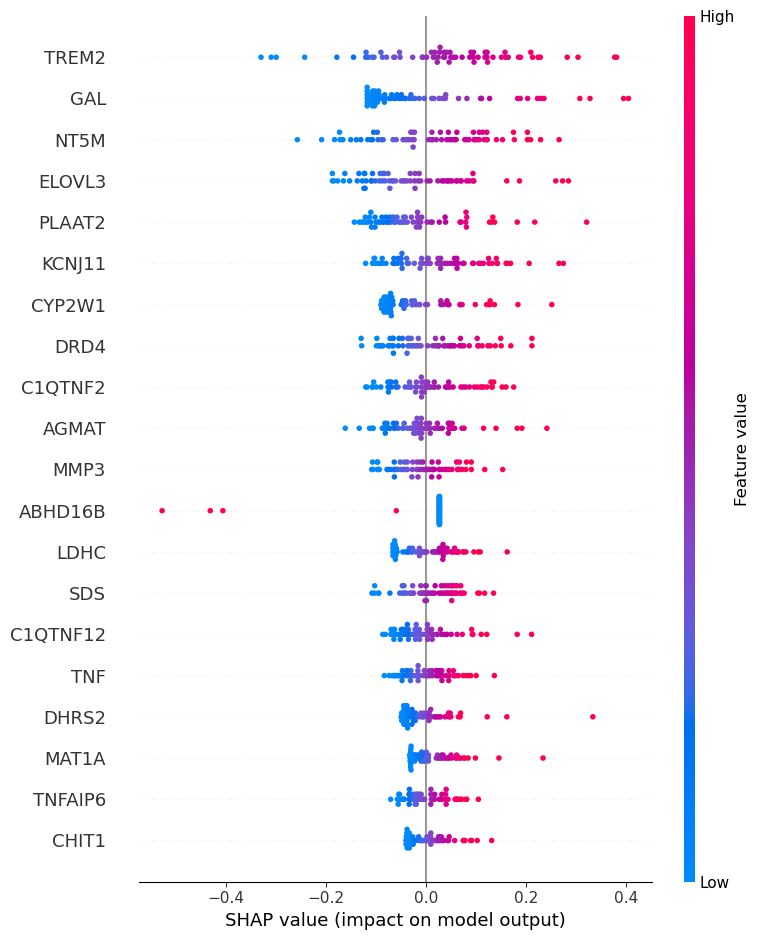


--- Accuracy Scores ---
Train Accuracy: 1.0
Validation Accuracy: 1.0
Test Accuracy: 1.0
Validation F1: 1.0
Test F1: 1.0


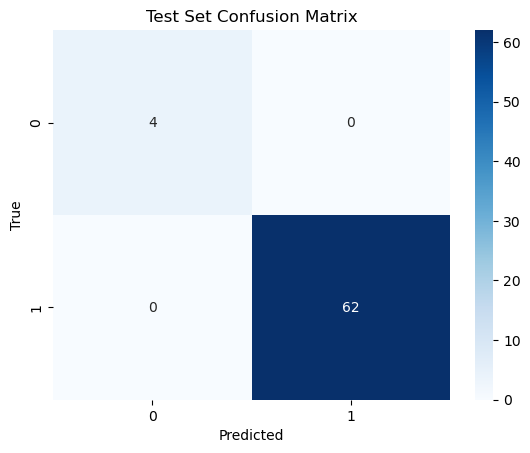

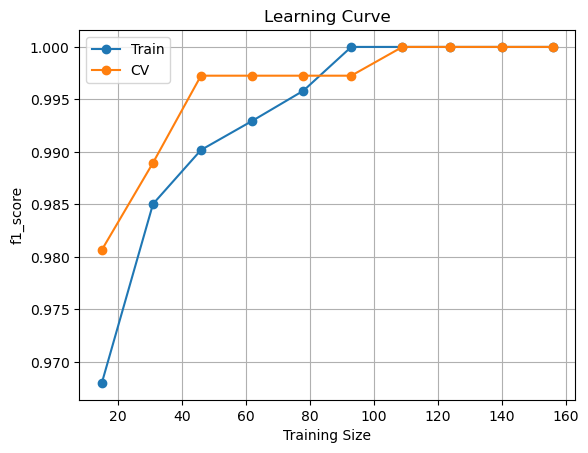

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, learning_curve, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, auc, precision_recall_curve, roc_auc_score, f1_score
)
from matplotlib_venn import venn3
import shap

# 1. 60-20-20 split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

# 2. Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# 3. RFE with Multiple Base Models and Hyperparameter Tuning
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

model_configs = {
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [5, 10, None],
            "min_samples_split": [2, 5],
            "min_samples_leaf": [1, 2],
            "class_weight": ['balanced']
        }
    },
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000, solver='liblinear'),
        "params": {
            "C": [0.01, 0.1, 1, 10],
            "penalty": ['l1', 'l2'],
            "class_weight": ['balanced']
        }
    },
    "SVM (Linear)": {
        "model": SVC(kernel='linear', probability=True),
        "params": {
            "C": [0.01, 0.1, 1, 10],
            "class_weight": ['balanced']
        }
    },
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric='logloss',scale_pos_weight=(sum(y_train==0)/sum(y_train==1)),error_score='raise'),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [3, 5, 7]
        }
    }
}

rfe_scores = {}
selected_features_per_model = {}
best_models = {}

for name, config in model_configs.items():
    print(f"\n>>> Processing {name}")
    base_model = config["model"]
    param_grid = config["params"]

    rfe = RFE(estimator=base_model, n_features_to_select=50, step=0.1)
    rfe.fit(X_train_scaled, y_train)
    selected_features = X.columns[rfe.support_].tolist()
    selected_features_per_model[name] = selected_features

    X_train_rfe = rfe.transform(X_train_scaled)
    grid = GridSearchCV(base_model, param_grid, cv=kfold, scoring='f1_macro', n_jobs=-1)
    grid.fit(X_train_rfe, y_train)
    best_models[name] = grid.best_estimator_
    scores = cross_val_score(grid.best_estimator_, X_train_rfe, y_train, cv=kfold, scoring='f1_macro', n_jobs=-1)
    rfe_scores[name] = scores
    print(f"{name} RFE + GridSearchCV: Mean F1 = {scores.mean():.4f} (+/- {scores.std():.4f})")

# Venn diagram for 3 model overlaps (choose 3 for simplicity)
sets = list(selected_features_per_model.values())
if len(sets) >= 3:
    set1, set2, set3 = map(set, sets[:3])
    venn3([set1, set2, set3], set_labels=list(selected_features_per_model.keys())[:3])
    plt.title("Top 50 Gene Overlap (RFE)")
    plt.show()

# 4. Automatically select the best model
best_model_name = max(rfe_scores, key=lambda k: rfe_scores[k].mean())
best_model = best_models[best_model_name]
print(f"\n>>> Best Model: {best_model_name} with F1 = {rfe_scores[best_model_name].mean():.4f}")

# Use its features for downstream pipeline
final_selected_features = selected_features_per_model[best_model_name]
X_train_sel = X_train[final_selected_features].values
X_val_sel = X_val[final_selected_features].values
X_test_sel = X_test[final_selected_features].values

# 5. Train best model
best_model.fit(X_train_sel, y_train)

# SHAP explanation
explainer = shap.Explainer(best_model, X_train_sel)
shap_values = explainer(X_test_sel)
shap.summary_plot(shap_values, features=X_test_sel, feature_names=final_selected_features)

# 6. Evaluate
y_train_pred = best_model.predict(X_train_sel)
y_val_pred = best_model.predict(X_val_sel)
y_test_pred = best_model.predict(X_test_sel)

y_val_prob = best_model.predict_proba(X_val_sel)[:, 1]
y_test_prob = best_model.predict_proba(X_test_sel)[:, 1]

print("\n--- Accuracy Scores ---")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Validation F1:", f1_score(y_val, y_val_pred, average='macro'))
print("Test F1:", f1_score(y_test, y_test_pred, average='macro'))

# Confusion matrix on test
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Test Set Confusion Matrix")
plt.xlabel("Predicted"); plt.ylabel("True")
plt.show()

# ROC curve on test
# fpr, tpr, _ = roc_curve(y_test, y_test_prob)
# roc_auc = roc_auc_score(y_test, y_test_prob)
# plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
# plt.plot([0, 1], [0, 1], 'k--')
# plt.title("Test ROC Curve"); plt.xlabel("FPR"); plt.ylabel("TPR")
# plt.legend(); plt.grid(True); plt.show()

# PR curve on test
# precision, recall, _ = precision_recall_curve(y_test, y_test_prob)
# pr_auc = auc(recall, precision)
# plt.plot(recall, precision, label=f"PR AUC = {pr_auc:.4f}")
# plt.title("Test Precision-Recall Curve")
# plt.xlabel("Recall"); plt.ylabel("Precision")
# plt.legend(); plt.grid(True); plt.show()

# Learning curve
train_sizes, train_scores, val_scores = learning_curve(
    best_model, X_train_sel, y_train, cv=5, scoring='f1',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label="Train")
plt.plot(train_sizes, val_scores.mean(axis=1), 'o-', label="CV")
plt.title("Learning Curve")
plt.xlabel("Training Size"); plt.ylabel("f1_score")
plt.legend(); plt.grid(True); plt.show()

# Save selected genes for each model
# pd.DataFrame.from_dict(selected_features_per_model, orient='index').transpose().to_csv("selected_genes_per_model.csv", index=False)


In [36]:
eval_results = []

for name, config in model_configs.items():
    ...
    # After training and predicting
    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_val, y_val_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_f1 = f1_score(y_train, y_train_pred, average='macro')
    val_f1 = f1_score(y_val, y_val_pred, average='macro')
    test_f1 = f1_score(y_test, y_test_pred, average='macro')

    roc = roc_auc_score(y_test, y_test_prob)
    pr_auc = auc(*precision_recall_curve(y_test, y_test_prob)[:2])

    eval_results.append({
        "Model": name,
        "Train Accuracy": train_acc,
        "Validation Accuracy": val_acc,
        "Test Accuracy": test_acc,
        "Train F1": train_f1,
        "Validation F1": val_f1,
        "Test F1": test_f1,
        "ROC AUC": roc,
        "PR AUC": pr_auc
    })

# Create DataFrame
summary_df = pd.DataFrame(eval_results).set_index("Model")
summary_df.to_csv("model_performance_summary.csv")
print(summary_df)


                     Train Accuracy  Validation Accuracy  Test Accuracy  \
Model                                                                     
Random Forest                   1.0                  1.0            1.0   
Logistic Regression             1.0                  1.0            1.0   
SVM (Linear)                    1.0                  1.0            1.0   
XGBoost                         1.0                  1.0            1.0   

                     Train F1  Validation F1  Test F1  ROC AUC    PR AUC  
Model                                                                     
Random Forest             1.0            1.0      1.0      1.0  0.060606  
Logistic Regression       1.0            1.0      1.0      1.0  0.060606  
SVM (Linear)              1.0            1.0      1.0      1.0  0.060606  
XGBoost                   1.0            1.0      1.0      1.0  0.060606  


In [13]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore', category=UserWarning)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Logistic LASSO with hyperparameter tuning
lasso = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42,class_weight="balanced")
param_grid = {'C': np.logspace(-4, 4, 20)}  # Tune C (inverse of lambda)
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model and parameters
best_model = grid_search.best_estimator_
best_C = grid_search.best_params_['C']
print(f"Best C: {best_C:.6f}")

# Step 5: Select genes (non-zero coefficients)
coef = best_model.coef_[0]
selected_genes = X_train.columns[coef != 0].tolist()
selected_coefs = coef[coef != 0]
print(f"Number of selected genes: {len(selected_genes)}")
print(f"Selected genes: {selected_genes}")

# Step 6: Save selected genes and their coefficients to CSV
genes_importance = pd.DataFrame({
    'Gene': selected_genes,
    'Coefficient': selected_coefs,
    'Abs_Coefficient': np.abs(selected_coefs)  # For ranking by importance
})
genes_importance = genes_importance.sort_values(by='Abs_Coefficient', ascending=False)
genes_importance.to_csv('selected_genes_lasso_Meta.csv', index=False)
print("Selected genes saved to 'selected_genes_lasso.csv'")

# Step 7: Build model on selected genes
if len(selected_genes) > 0:
    # Subset data to selected genes
    X_train_selected = X_train[selected_genes]
    X_test_selected = X_test[selected_genes]

    # Train logistic regression (no L1 penalty) on selected genes
    model = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000, random_state=42,class_weight="balanced")
    model.fit(X_train_selected, y_train)

    # Step 8: Evaluate model
    y_pred = model.predict(X_test_selected)
    y_pred_proba = model.predict_proba(X_test_selected)[:, 1]

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("\nModel Performance on Test Set:")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"AUC-ROC: {auc:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-Score: {f1:.3f}")
else:
    print("No genes selected. Cannot build model.")

Best C: 0.615848
Number of selected genes: 11
Selected genes: ['APOE', 'ELOVL3', 'AGMAT', 'TREM2', 'CYP2W1', 'IFI6', 'MMP3', 'NT5M', 'APOC1', 'NNMT', 'ABHD16B']
Selected genes saved to 'selected_genes_lasso.csv'

Model Performance on Test Set:
Accuracy: 1.000
AUC-ROC: 1.000
Precision: 1.000
Recall: 1.000
F1-Score: 1.000


In [10]:
from sklearn.model_selection import cross_val_score
lasso = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42)
param_grid = {'C': np.logspace(-4, 4, 50)}  # Tune C (inverse of regularization strength lambda)
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model and parameters
best_model = grid_search.best_estimator_
best_C = grid_search.best_params_['C']
best_cv_score = grid_search.best_score_
print(f"Best C: {best_C:.6f}")
print(f"Cross-validation AUC-ROC for LASSO: {best_cv_score:.3f}")

# Step 5: Extract all genes with non-zero coefficients
coef = best_model.coef_[0]
selected_genes = X_train.columns[coef != 0].tolist()
selected_coefs = coef[coef != 0]
print(f"Number of selected genes with non-zero coefficients: {len(selected_genes)}")
print(f"Selected genes: {selected_genes}")

# Step 6: Save selected genes and their coefficients to CSV, ranked by importance
genes_importance = pd.DataFrame({
    'Gene': selected_genes,
    'Coefficient': selected_coefs,
    'Abs_Coefficient': np.abs(selected_coefs)
})
genes_importance = genes_importance.sort_values(by='Abs_Coefficient', ascending=False)
genes_importance.to_csv('selected_genes_all_nonzero.csv', index=False)
print("Selected genes with non-zero coefficients saved to 'selected_genes.csv'")

# Step 7: Build and evaluate model on selected genes
if len(selected_genes) > 0:
    # Subset data to selected genes
    X_train_selected = X_train[selected_genes]
    X_test_selected = X_test[selected_genes]

    # Train logistic regression (no regularization) on selected genes
    model = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000, random_state=42)
    
    # Evaluate model using 5-fold cross-validation on training data
    cv_accuracy = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='accuracy').mean()
    cv_auc = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='roc_auc').mean()
    cv_precision = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='precision').mean()
    cv_recall = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='recall').mean()
    cv_f1 = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='f1').mean()

    print("\nCross-Validation Performance (5-fold) on Selected Genes:")
    print(f"Accuracy: {cv_accuracy:.3f}")
    print(f"AUC-ROC: {cv_auc:.3f}")
    print(f"Precision: {cv_precision:.3f}")
    print(f"Recall: {cv_recall:.3f}")
    print(f"F1-Score: {cv_f1:.3f}")

    # Fit model on full training data and evaluate on test set
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    y_pred_proba = model.predict_proba(X_test_selected)[:, 1]

    # Test set metrics
    test_accuracy = accuracy_score(y_test, y_pred)
    test_auc = roc_auc_score(y_test, y_pred_proba)
    test_precision = precision_score(y_test, y_pred)
    test_recall = recall_score(y_test, y_pred)
    test_f1 = f1_score(y_test, y_pred)

    print("\nTest Set Performance:")
    print(f"Accuracy: {test_accuracy:.3f}")
    print(f"AUC-ROC: {test_auc:.3f}")
    print(f"Precision: {test_precision:.3f}")
    print(f"Recall: {test_recall:.3f}")
    print(f"F1-Score: {test_f1:.3f}")
else:
    print("No genes with non-zero coefficients selected. Cannot build model.")

Best C: 0.040949
Cross-validation AUC-ROC for LASSO: 1.000
Number of selected genes with non-zero coefficients: 11
Selected genes: ['MIR3654', 'TMSB10', 'MT.CO1', 'MT.CYB', 'RN7SL2', 'MT.ND4', 'MT.ATP6', 'MT.RNR2', 'MT.CO3', 'RN7SK', 'MT.CO2']
Selected genes with non-zero coefficients saved to 'selected_genes.csv'

Cross-Validation Performance (5-fold) on Selected Genes:
Accuracy: 1.000
AUC-ROC: 1.000
Precision: 1.000
Recall: 1.000
F1-Score: 1.000

Test Set Performance:
Accuracy: 1.000
AUC-ROC: 1.000
Precision: 1.000
Recall: 1.000
F1-Score: 1.000


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
import warnings

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 1: Train Random Forest with hyperparameter tuning
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Best model
best_rf = grid_search_rf.best_estimator_
print("Best Random Forest Parameters:", grid_search_rf.best_params_)

# Step 2: Extract top important genes
importances = best_rf.feature_importances_
selected_rf_genes_df = pd.DataFrame({
    'Gene': X_train.columns,
    'Importance': importances
})
selected_rf_genes_df = selected_rf_genes_df[selected_rf_genes_df['Importance'] > 0]
selected_rf_genes_df['Rank'] = selected_rf_genes_df['Importance'].rank(ascending=False)
selected_rf_genes_df = selected_rf_genes_df.sort_values(by='Importance', ascending=False)

# Save all important genes to CSV
selected_rf_genes_df.to_csv('selected_genes_random_forest_meta_top_27.csv', index=False)
print(f"Number of selected important genes: {selected_rf_genes_df.shape[0]}")
print("Top important genes saved to 'selected_genes_random_forest.csv'")

# Step 3: Build model using selected genes only
selected_rf_genes = selected_rf_genes_df['Gene'].tolist()
X_train_rf_selected = X_train[selected_rf_genes]
X_test_rf_selected = X_test[selected_rf_genes]

model_rf_selected = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Cross-validation on training set
cv_accuracy_rf = cross_val_score(model_rf_selected, X_train_rf_selected, y_train, cv=5, scoring='accuracy').mean()
cv_auc_rf = cross_val_score(model_rf_selected, X_train_rf_selected, y_train, cv=5, scoring='roc_auc').mean()
cv_precision_rf = cross_val_score(model_rf_selected, X_train_rf_selected, y_train, cv=5, scoring='precision').mean()
cv_recall_rf = cross_val_score(model_rf_selected, X_train_rf_selected, y_train, cv=5, scoring='recall').mean()
cv_f1_rf = cross_val_score(model_rf_selected, X_train_rf_selected, y_train, cv=5, scoring='f1').mean()

print("\nCross-Validation Performance (5-fold) on Selected Genes (Random Forest):")
print(f"Accuracy: {cv_accuracy_rf:.3f}")
print(f"AUC-ROC: {cv_auc_rf:.3f}")
print(f"Precision: {cv_precision_rf:.3f}")
print(f"Recall: {cv_recall_rf:.3f}")
print(f"F1-Score: {cv_f1_rf:.3f}")

# Train on full training data and evaluate on test set
model_rf_selected.fit(X_train_rf_selected, y_train)
y_pred_rf = model_rf_selected.predict(X_test_rf_selected)
y_pred_proba_rf = model_rf_selected.predict_proba(X_test_rf_selected)[:, 1]

# Test set performance
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)
test_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
test_precision_rf = precision_score(y_test, y_pred_rf)
test_recall_rf = recall_score(y_test, y_pred_rf)
test_f1_rf = f1_score(y_test, y_pred_rf)

print("\nTest Set Performance (Random Forest):")
print(f"Accuracy: {test_accuracy_rf:.3f}")
print(f"AUC-ROC: {test_auc_rf:.3f}")
print(f"Precision: {test_precision_rf:.3f}")
print(f"Recall: {test_recall_rf:.3f}")
print(f"F1-Score: {test_f1_rf:.3f}")


Best Random Forest Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Number of selected important genes: 28
Top important genes saved to 'selected_genes_random_forest.csv'

Cross-Validation Performance (5-fold) on Selected Genes (Random Forest):
Accuracy: 0.974
AUC-ROC: 0.983
Precision: 0.973
Recall: 1.000
F1-Score: 0.986

Test Set Performance (Random Forest):
Accuracy: 1.000
AUC-ROC: 1.000
Precision: 1.000
Recall: 1.000
F1-Score: 1.000


In [13]:
X[["MIR21"]].tail(20)

,MIR21
308,0.000000
309,3.375735
310,2.673556
311,3.019702
312,3.634593
313,1.752320
314,2.836732
315,2.998376
316,4.467932
317,6.865424


In [4]:
meta_genes=pd.read_csv("category_gene_lists/All_Metabolic_genes.csv")

In [5]:
l1=list(meta_genes["Gene"])

In [6]:
len(l1)

2296

In [27]:
rf=pd.read_csv("selected_genes_random_forest_meta.csv")
print(list(rf["Gene"].iloc[:24]))

['ABHD16B', 'IDI2', 'KCNJ11', 'NUDT4B', 'DHRS2', 'AMY1C', 'SULT1A4', 'AMY1A', 'TLCD3B', 'AS3MT', 'AGMAT', 'AMY2A', 'UGT1A9', 'NPC1L1', 'SLCO1B1', 'UGT2B11', 'SULT1C3', 'NOVA1', 'OLAH', 'AMY1B', 'UGT1A3', 'TRH', 'HMGCLL1', 'TNFAIP6']


In [9]:
X=X[l1]

In [10]:
X.drop(["CIDEB","HYI","TREX1"],axis=1,inplace=True)

In [14]:
df_1=pd.read_csv("DEG_significant.csv")

In [18]:
print(list(df_1["Unnamed: 0"]))

['CIDEB', 'HYI', 'TREX1', 'ABHD16B', 'IDI2', 'SDS', 'TREM2', 'NT5M', 'AGMAT', 'ELOVL3', 'ANKLE1', 'KCNJ11', 'C1QTNF2', 'LDHC', 'TNFAIP6', 'MMP3', 'COX4I2', 'C1QTNF12', 'DHRS2', 'TNF', 'IFNG', 'NPBWR1', 'GAL', 'PLAAT2', 'CHIT1', 'RBP4', 'CYP2W1']


RFE



>>> Processing Random Forest


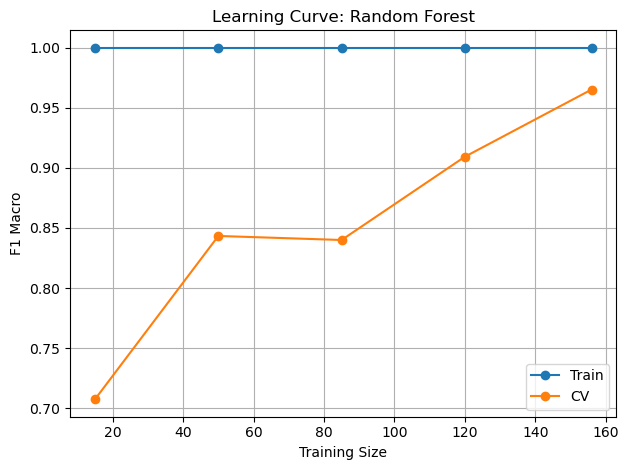


>>> Processing Logistic Regression


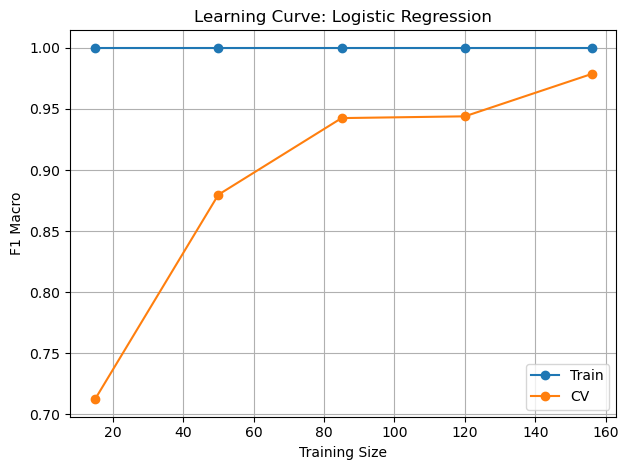


>>> Processing SVM (Linear)


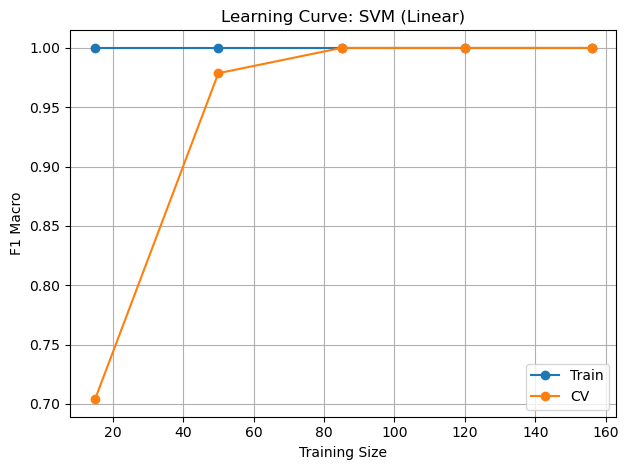


>>> Processing XGBoost


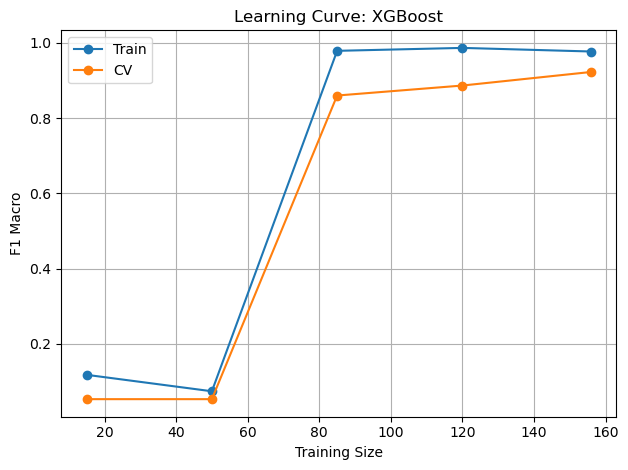

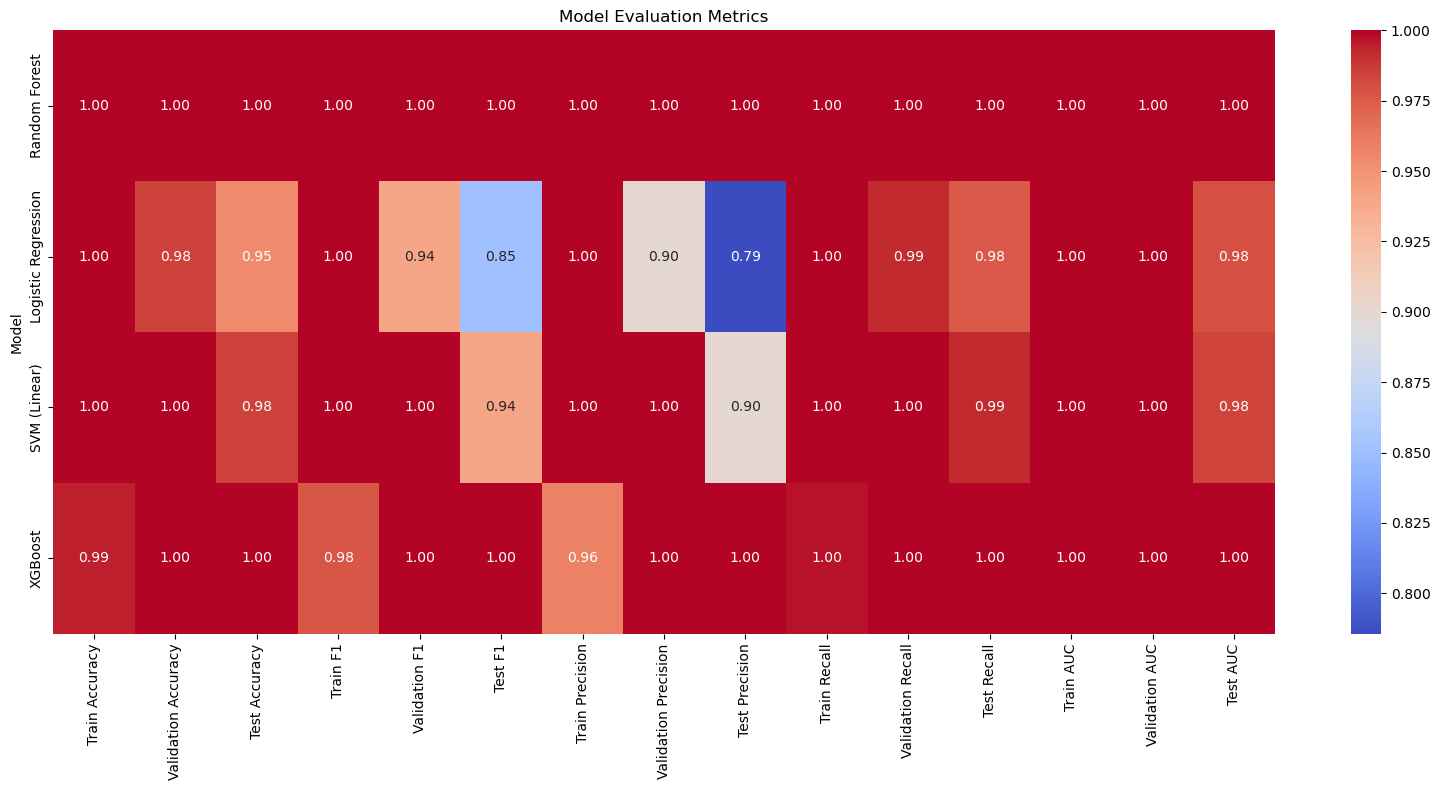

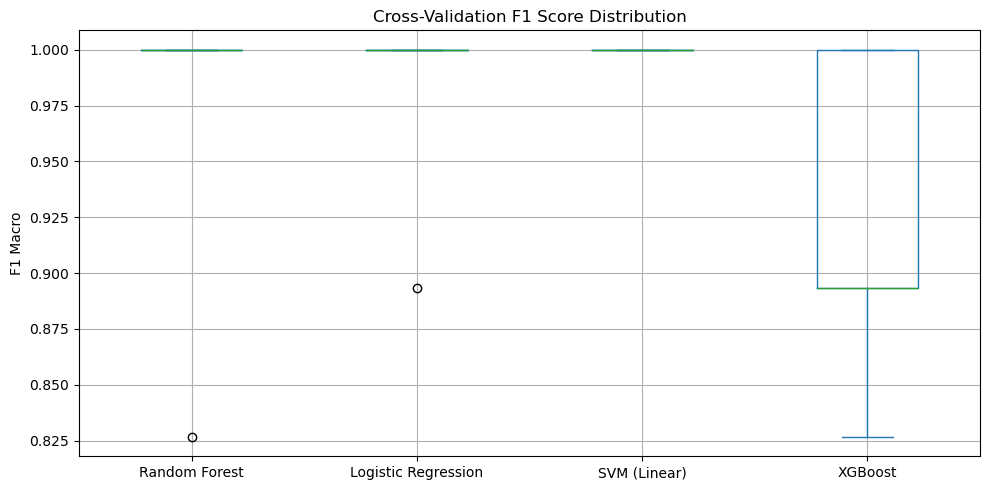

<Figure size 640x480 with 0 Axes>

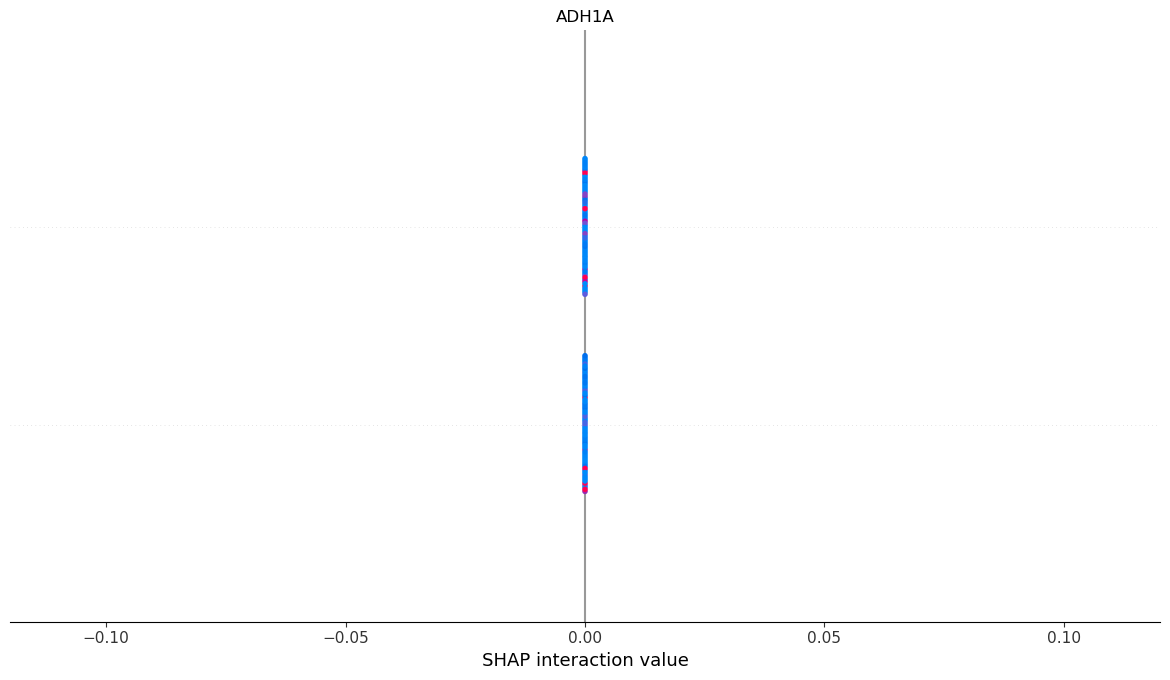

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, learning_curve, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, auc, precision_recall_curve, roc_auc_score, f1_score, recall_score, precision_score
)
from matplotlib_venn import venn3
import shap

# 1. 60-20-20 split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

# 2. Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# 3. RFE with Multiple Base Models and Hyperparameter Tuning
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

model_configs = {
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [5, 10, None],
            "min_samples_split": [2, 5],
            "min_samples_leaf": [1, 2],
            "class_weight": ['balanced']
        }
    },
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000, solver='liblinear'),
        "params": {
            "C": [0.01, 0.1, 1, 10],
            "penalty": ['l1', 'l2'],
            "class_weight": ['balanced']
        }
    },
    "SVM (Linear)": {
        "model": SVC(kernel='linear', probability=True),
        "params": {
            "C": [0.01, 0.1, 1, 10],
            "class_weight": ['balanced']
        }
    },
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                               scale_pos_weight=(sum(y_train==0)/sum(y_train==1)), error_score='raise'),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [3, 5, 7]
        }
    }
}

evaluation_summary = []
rfe_scores = {}
selected_features_per_model = {}
best_models = {}

for name, config in model_configs.items():
    print(f"\n>>> Processing {name}")
    base_model = config["model"]
    param_grid = config["params"]

    rfe = RFE(estimator=base_model, n_features_to_select=50, step=0.1)
    rfe.fit(X_train_scaled, y_train)
    selected_features = X.columns[rfe.support_].tolist()
    selected_features_per_model[name] = selected_features

    X_train_rfe = rfe.transform(X_train_scaled)
    X_val_rfe = rfe.transform(X_val_scaled)
    X_test_rfe = rfe.transform(X_test_scaled)

    grid = GridSearchCV(base_model, param_grid, cv=kfold, scoring='f1_macro', n_jobs=-1)
    grid.fit(X_train_rfe, y_train)
    best_model = grid.best_estimator_
    best_models[name] = best_model

    y_train_pred = best_model.predict(X_train_rfe)
    y_val_pred = best_model.predict(X_val_rfe)
    y_test_pred = best_model.predict(X_test_rfe)

    y_train_prob = best_model.predict_proba(X_train_rfe)[:, 1]
    y_val_prob = best_model.predict_proba(X_val_rfe)[:, 1]
    y_test_prob = best_model.predict_proba(X_test_rfe)[:, 1]

    cv_scores = cross_val_score(best_model, X_train_rfe, y_train, cv=kfold, scoring='f1_macro')
    rfe_scores[name] = cv_scores

    evaluation_summary.append({
        "Model": name,
        "Train Accuracy": accuracy_score(y_train, y_train_pred),
        "Validation Accuracy": accuracy_score(y_val, y_val_pred),
        "Test Accuracy": accuracy_score(y_test, y_test_pred),
        "Train F1": f1_score(y_train, y_train_pred, average='macro'),
        "Validation F1": f1_score(y_val, y_val_pred, average='macro'),
        "Test F1": f1_score(y_test, y_test_pred, average='macro'),
        "Train Precision": precision_score(y_train, y_train_pred, average='macro'),
        "Validation Precision": precision_score(y_val, y_val_pred, average='macro'),
        "Test Precision": precision_score(y_test, y_test_pred, average='macro'),
        "Train Recall": recall_score(y_train, y_train_pred, average='macro'),
        "Validation Recall": recall_score(y_val, y_val_pred, average='macro'),
        "Test Recall": recall_score(y_test, y_test_pred, average='macro'),
        "Train AUC": roc_auc_score(y_train, y_train_prob),
        "Validation AUC": roc_auc_score(y_val, y_val_prob),
        "Test AUC": roc_auc_score(y_test, y_test_prob),
        "CV F1 Mean": cv_scores.mean(),
        "CV F1 Std": cv_scores.std()
    })

    train_sizes, train_scores, val_scores = learning_curve(
        best_model, X_train_rfe, y_train, cv=kfold, scoring='f1_macro', train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1
    )
    plt.figure()
    plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label="Train")
    plt.plot(train_sizes, val_scores.mean(axis=1), 'o-', label="CV")
    plt.title(f"Learning Curve: {name}")
    plt.xlabel("Training Size")
    plt.ylabel("F1 Macro")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Summary
summary_df = pd.DataFrame(evaluation_summary)
summary_df.to_csv("model_evaluation_summary.csv", index=False)

# Heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(summary_df.set_index("Model").drop(columns=["CV F1 Mean", "CV F1 Std"]), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Model Evaluation Metrics")
plt.tight_layout()
plt.show()

# CV Score Boxplot
cv_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in rfe_scores.items()]))
cv_df.plot(kind='box', figsize=(10, 5), title='Cross-Validation F1 Score Distribution')
plt.ylabel("F1 Macro")
plt.grid(True)
plt.tight_layout()
plt.show()

# SHAP for best model
best_model_name = summary_df.sort_values("Validation F1", ascending=False).iloc[0]["Model"]
final_model = best_models[best_model_name]
final_features = selected_features_per_model[best_model_name]

X_train_final = X_train[final_features].values
X_test_final = X_test[final_features].values

explainer = shap.Explainer(final_model, X_train_final)
shap_values = explainer(X_test_final)
shap.summary_plot(shap_values, features=X_test_final, feature_names=final_features)
